# Final Project Submission

Please fill out:
* Student name: **JAEL AKECH**
* Student pace: **PART TIME**
* Scheduled project review date/time: **02/06/2022**
* Instructor name: **WILLIAM OKOMBA**
* Blog post URL: **N/A**
* **GROUP 8**



<img src="housing_image.jpg" alt="Housing Image" style="width:80%;">

# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


# Predictive analysis of House prices in King County

### *Renovations: Worth the Investment or a Risky Gamble?*

## Overview

This project uses linear regression analysis to infer how certain variables impact housing prices and by how much. The aim is to gain insights and make predictions about the factors that affect house sales in King County area as well as lucrative neighbourhoods to invest in while using statistical techniques to support relevant recommendations.

## Business problem

The real estate agency wants to provide homeowners with advice on how home renovations can potentially increase the estimated value of their homes and by what amount. The agency aims to offer valuable insights to homeowners, helping them make informed decisions about renovation projects that can maximize their return on investment when selling their properties.

## Business objectives

The analysis aims to answer below questions in trying to predict the prices;

1. To determine how much would adding an extension to the lot area of the home likely increase sale price?


2. To examine how much would adding an additional bathroom likely increase sale price?


3. To determine how much would adding an extension to the living area of the home likely increase sale price?


4. To examine how much would adding an additional floor to a house likely increase sale price? 

## Metric of Success

Our metric of success will be the R-Squared and the Root Mean Square of Errors(RMSE).
This will be the final step in evaluating the performance of the model by doing a train-test split, which will give us an idea of how the model would perform with new data for the same variables that the model will be trained on, and another set that it will be tested on. By default, the function takes 80% of the data as the training subset and the other 20% as its test subset.

## Data understanding

The dataset used for predicting the sales price of houses in King County is found in `kc_house_data.csv`. It comprises 21,597 observations and consists of 20 house features along with a column indicating the house price. The data covers homes sold between May 2014 and May 2015.
Out of the 20 features, eight are continuous numerical variables that provide information about the area dimensions and geographical location of the house. These variables offer a general overview of the house's structure and characteristics. The remaining attributes are discrete variables, which offer more detailed information about specific components of the house.
The discrete variables include quantifications of various items within the house, such as the number of bedrooms, bathrooms, presence of a waterfront, and floor level. Some attributes also provide background information about the house, such as the year of construction, year of innovation, previous selling price, and date of sale.

Importing the relevant libraries and loading the dataset from `kc_house_data.csv`.   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels
import math
import matplotlib.pyplot as plt
from scipy.special import logsumexp
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from scipy import stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from statsmodels.formula.api import ols

In [2]:
# Displaying the DataFrame
df = pd.read_csv("data/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
# Checking on the columns in our dataset
df.columns 

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
# checking the number of rows and columns
df.shape

(21597, 21)

We have 21,597 rows of data, meaning we have information about 21,597 homes. That is plenty of data with which to build a model.
However, not every row has complete information about a given home, such as `yr_renovated` having fewer than 21,597 records.


In [5]:
# checking the summary statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


This gives us a great overview of the data we have. A few key takeaways are:

- Homes are priced between 78,000 and 7,700,000 dollars
- Most homes are between 322,000 and 645,000 dollars
- The avereage home has 3.3 bedrooms and 2.1 bathrooms, with about 2,080 living square footage
- All homes have between 1 and 3.5 floors
- The average home was built around 1971, but some are over 100 years old
- We noticed that there is a home listed as having 33 bedrooms. Either that's an extreme outlier, or some sort of input error. We will investigate that later.

So now that we have a basic understanding of the data we're working with, we can dive into some more information that we will need in order to build a model later. By using the `.info()` method, we can pull up information about missing data values, how many rows of data we have, and whether values are being read as text or as numerical data.

In [6]:
# checking the metadata of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

From the metadata, not every row has complete information about a given home, such as `yr_renovated` having fewer than 21,597 entries.

Furthermore, not all columns of data are being read as quantitative data. In this case, some columns are being read as numbers, whether that's in integer form or float (numbers with decimals) form, while others are being read as text inputs, or objects.

It looks like we'll have to convert some columns with qualitative data (such as view, waterfront, and condition) into integers or floats so we can build models with them. We'll also have to replace null values for the waterfront, view, and yr_renovated columns.

In [7]:
# checking for the total number of null values per column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Based on the dataset waterfront, view and yr_renovated have the summation of 2,376, 63 and 3,842 null values respectively.

In [8]:
# dropping null values
df.dropna(inplace=True)

In [9]:
# checking if the null values are successfully droped.
df.isna().sum() 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
# checking on duplicated values in id column.
duplicated=df["id"].duplicated().sum()
duplicated

86

This shows that there are 86 duplicates in the `id` column. This is equivalent to 86 houses from the the dataset. Dropping the mentioned number may not skew the dataset.

In [11]:
# dropping the duplicates
df.drop_duplicates(subset='id', inplace=True)

In [12]:
# confirming that the duplicates have been dropped successfully
duplicated=df["id"].duplicated().sum()
duplicated

0

# Exploratory Data Analysis (EDA)

## Univariate analysis

The stage involve exploration process, which involves generating and plotting histograms and box plots. This crucial step allows us to gain insight into the distribution patterns of the data for each variable. By visualizing the histograms, we can better comprehend the spread and frequency of values within each variable, providing a foundation for further analysis. Box plots help us identify potential outliers.

In [13]:
# Checking on measures of central tendency and dispersion

price_mean = df["price"].mean()
price_mode = df["price"].mode()[0]
price_median = df["price"].median()
price_std = df["price"].std()

print("Mean:", price_mean)
print("Mode:", price_mode)
print("Median:", price_median)
print("Standard Deviation:", price_std)


Mean: 541492.6832737944
Mode: 350000.0
Median: 450000.0
Standard Deviation: 372603.6845589659


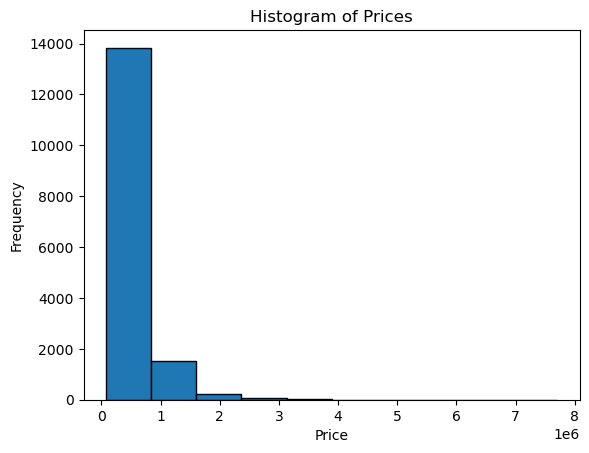

In [14]:
# Plotting a histogram of price

plt.hist(df["price"], bins=10, edgecolor='black')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Prices")
plt.savefig('Visualization1')

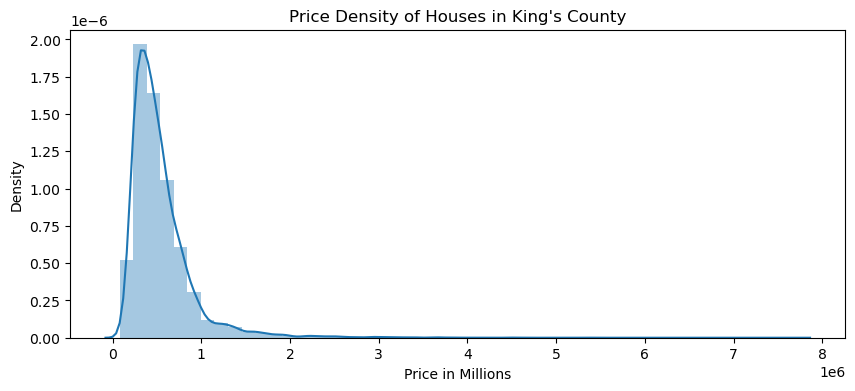

In [15]:
# Plotting a histogram/kernel density estimate of price

plt.figure(figsize=(10,4))

price_dist = sns.distplot(df["price"])
price_dist.set(xlabel="Price in Millions", title="Price Density of Houses in King's County")
plt.savefig('Visualization2')

As we can see, the distribution of house prices is right-skewed. This means that there are a large number of houses that are relatively inexpensive, but there are also a small number of houses that are very expensive.

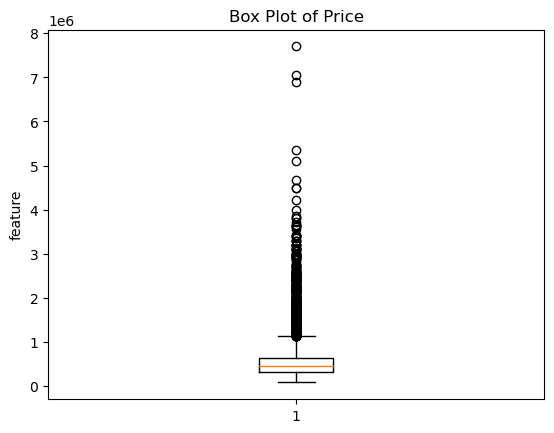

In [16]:
# Checking on outliers in the price variable

plt.figure()
plt.boxplot(df['price'])
plt.ylabel("feature")
plt.title('Box Plot of Price')
plt.savefig('Visualization3')

Based on the box plot there is presence of outliers but we decided to keep them based on the assumption that they are a true representation of the real-world dataset.

Descriptive Statistics for bedrooms
count    15676.000000
mean         3.379434
std          0.935193
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64



<Figure size 1200x800 with 0 Axes>

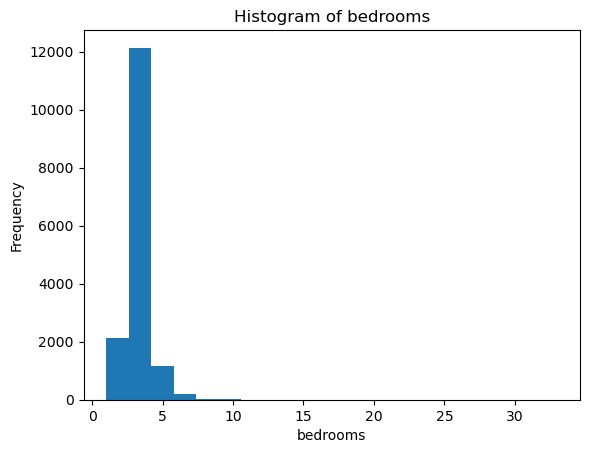

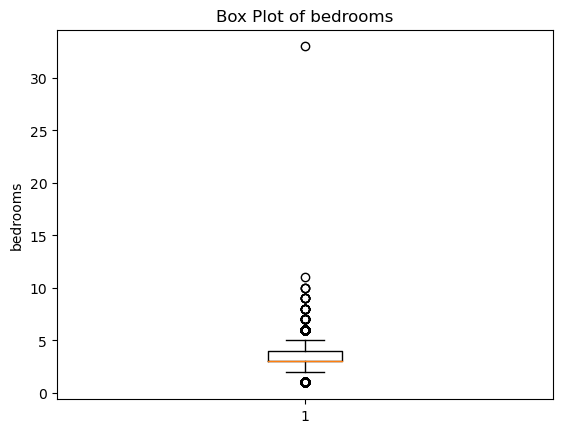

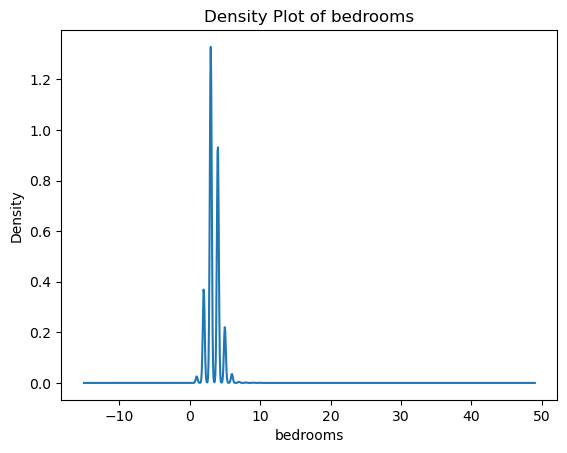

Descriptive Statistics for bathrooms
count    15676.000000
mean         2.122066
std          0.766735
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64



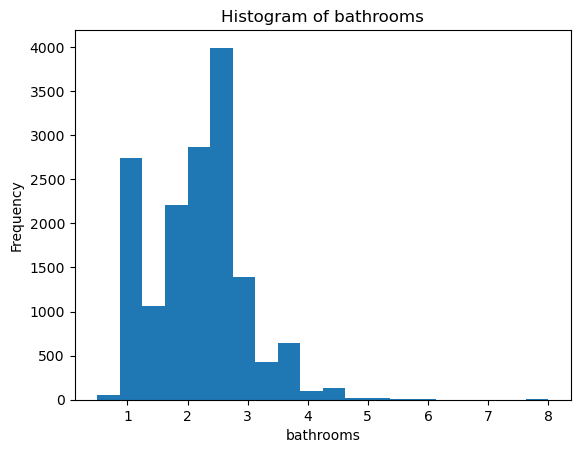

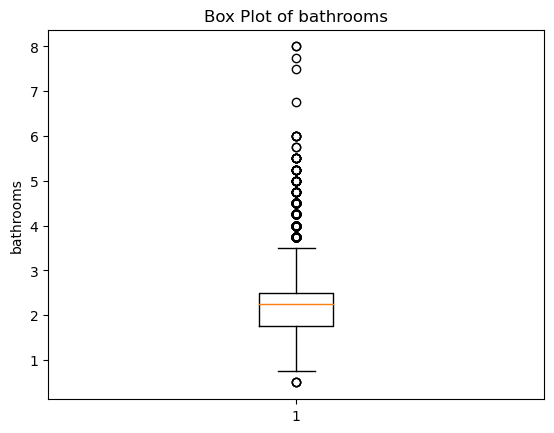

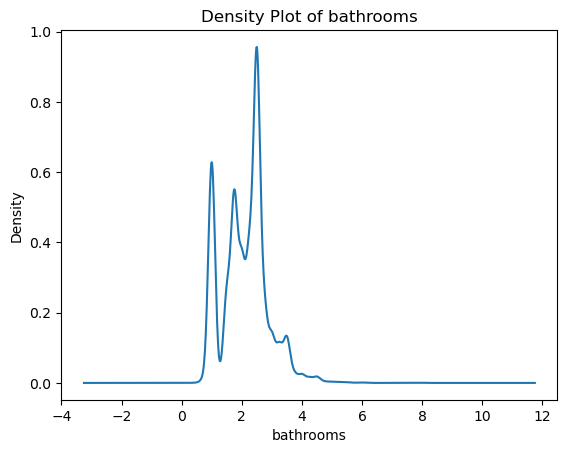

Descriptive Statistics for sqft_living
count    15676.000000
mean      2086.057285
std        918.753332
min        370.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64



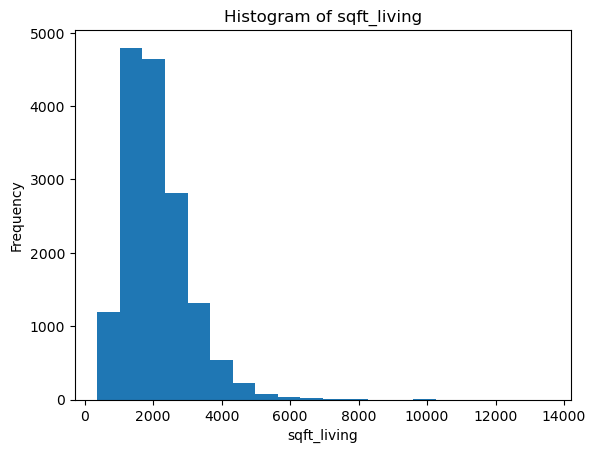

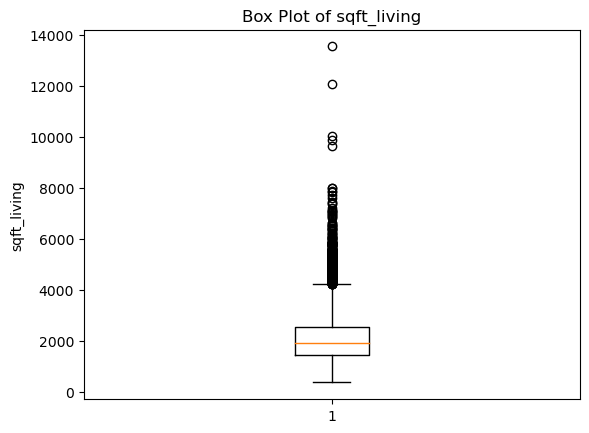

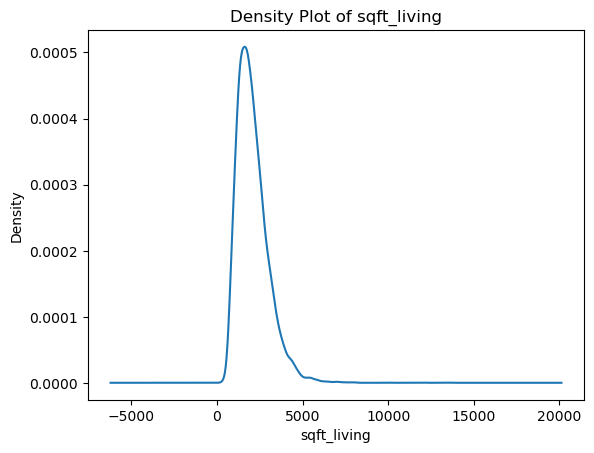

Descriptive Statistics for sqft_lot
count    1.567600e+04
mean     1.529400e+04
std      4.189635e+04
min      5.200000e+02
25%      5.045250e+03
50%      7.600000e+03
75%      1.071700e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64



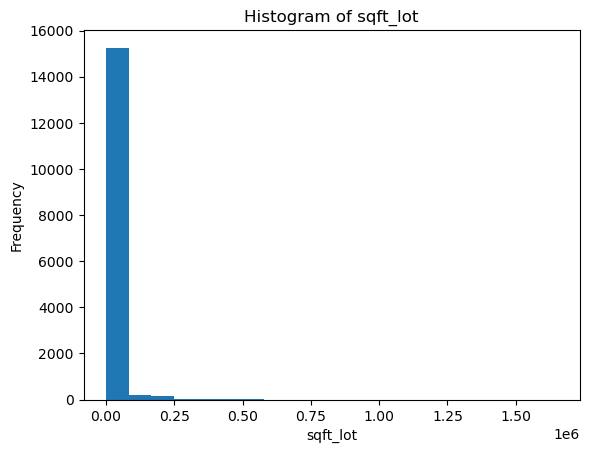

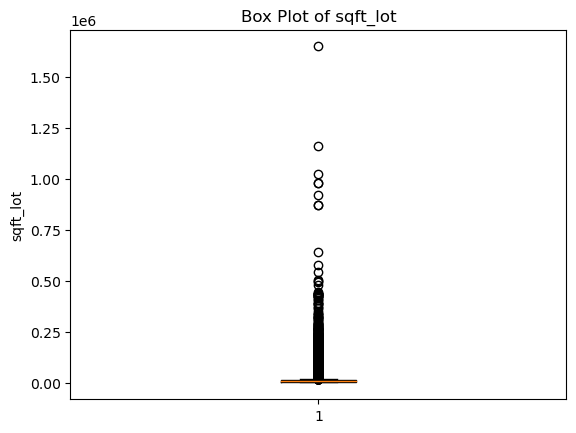

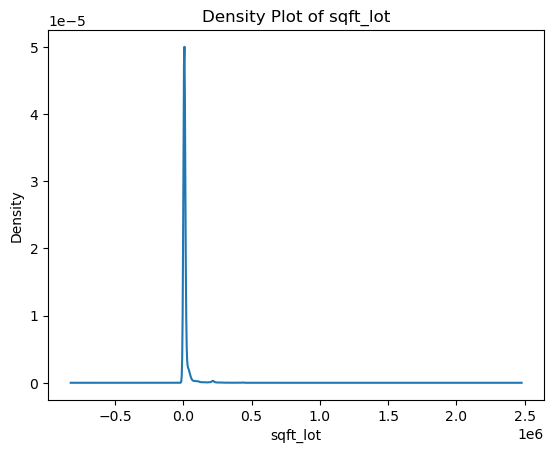

Descriptive Statistics for floors
count    15676.000000
mean         1.496587
std          0.539689
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64



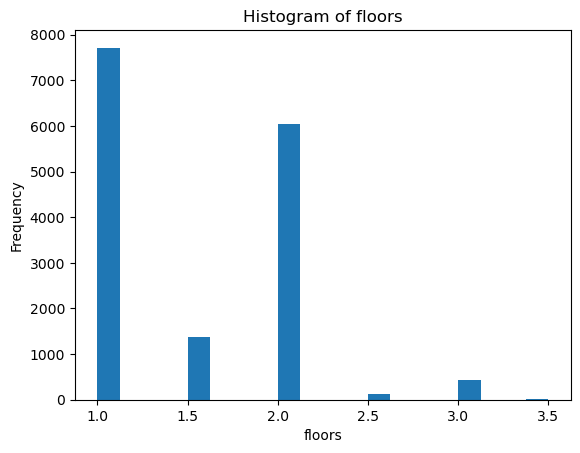

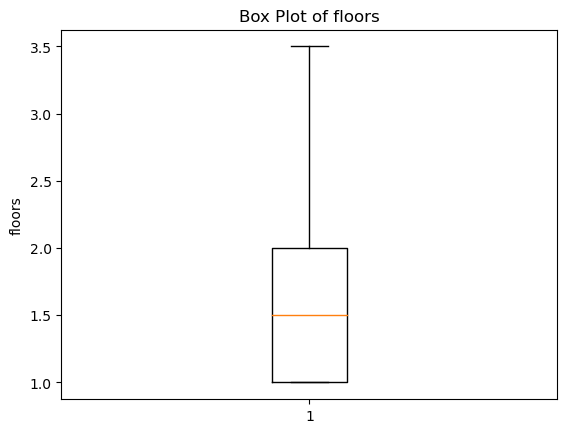

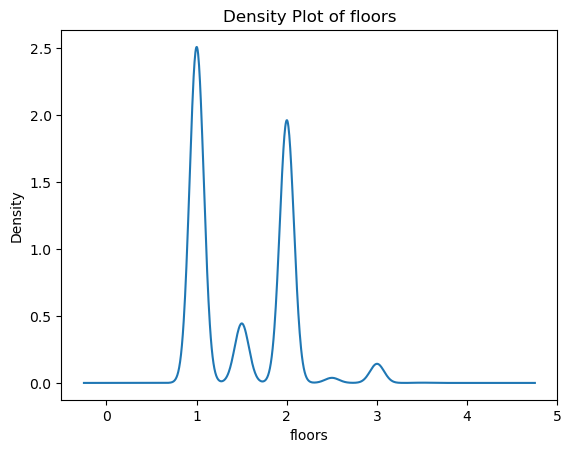

Descriptive Statistics for zipcode
count    15676.000000
mean     98077.487114
std         53.366170
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98117.000000
max      98199.000000
Name: zipcode, dtype: float64



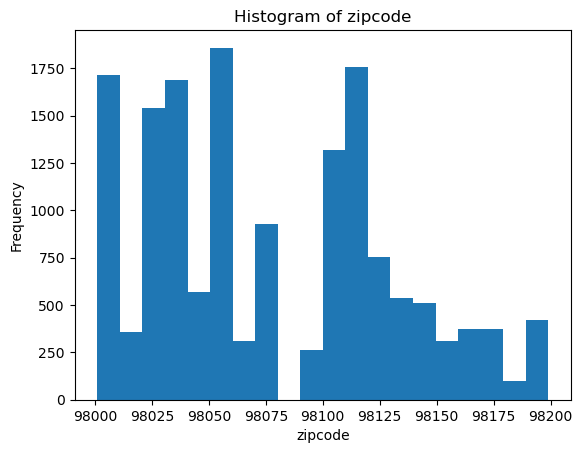

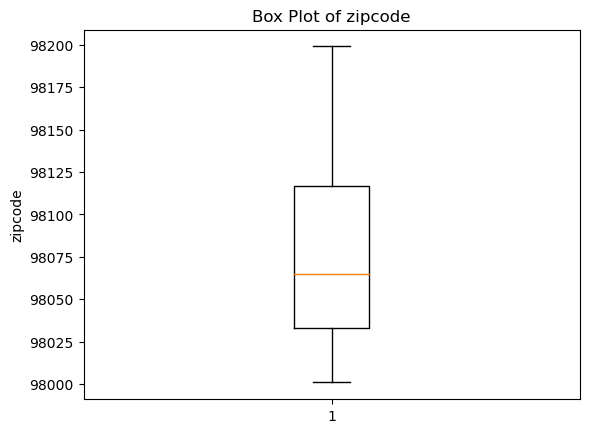

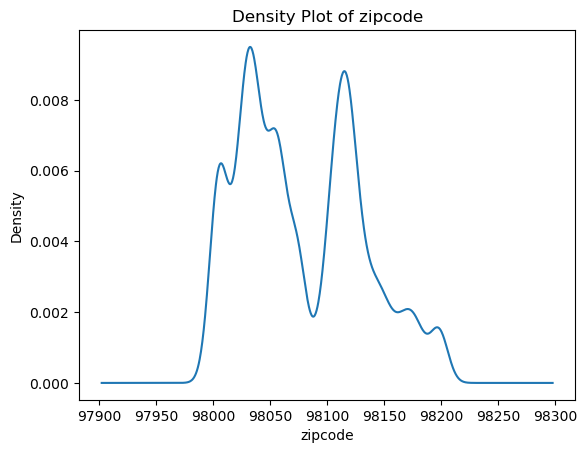

Descriptive Statistics for sqft_living15
count    15676.000000
mean      1991.289168
std        684.179299
min        399.000000
25%       1490.000000
50%       1850.000000
75%       2370.000000
max       6210.000000
Name: sqft_living15, dtype: float64



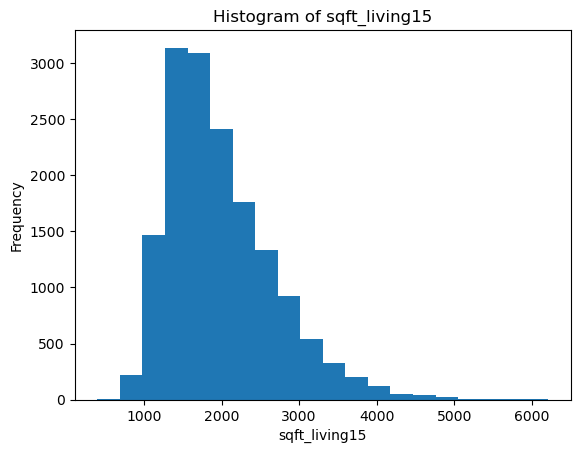

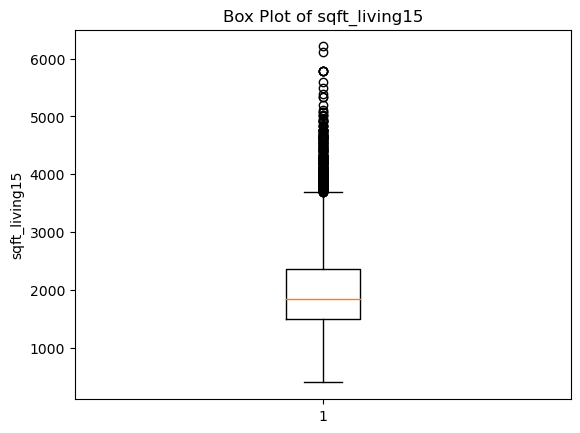

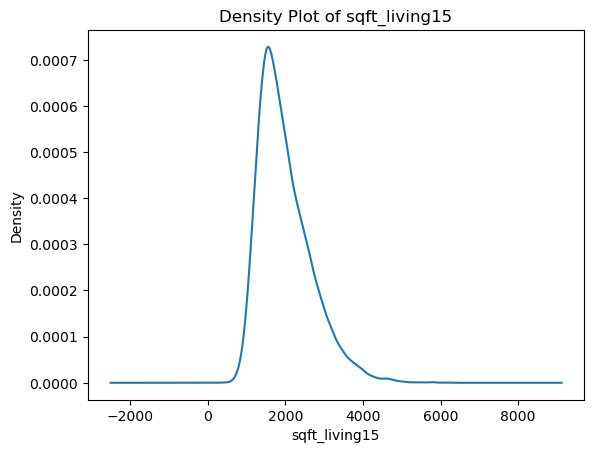

Descriptive Statistics for sqft_lot15
count     15676.000000
mean      12911.040125
std       28037.170327
min         659.000000
25%        5100.000000
50%        7620.000000
75%       10102.250000
max      871200.000000
Name: sqft_lot15, dtype: float64



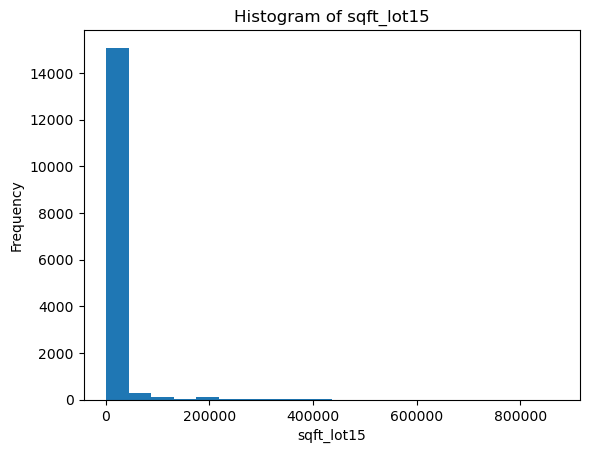

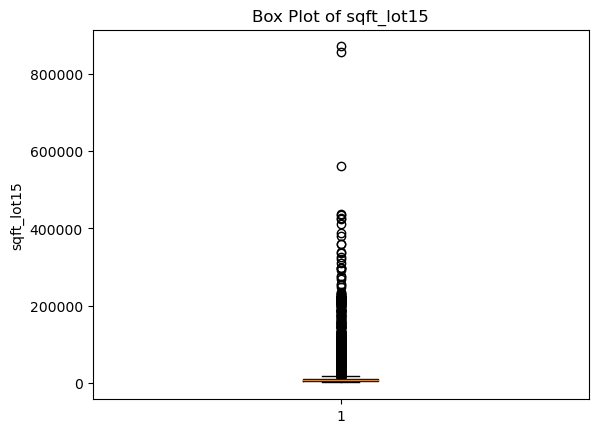

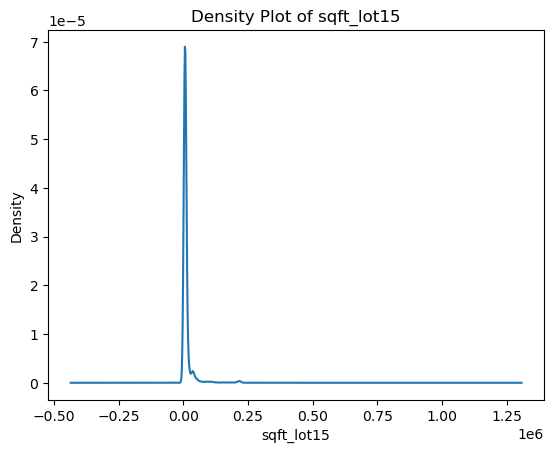

In [17]:
# Plotting Histogram, density plots and box plot

# Select the desired features
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','zipcode', 'sqft_living15','sqft_lot15']
plt.figure(figsize=(12, 8))
ncols=3
nrows=4
# Perform univariate analysis for each feature
for feature in features:
    # Descriptive Statistics
    print('Descriptive Statistics for', feature)
    print(df[feature].describe())
    print()
    # Histogram
    plt.figure()
    plt.hist(df[feature], bins=20)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + feature)
    plt.show()
    # Box Plot
    plt.figure()
    plt.boxplot(df[feature])
    plt.ylabel(feature)
    plt.title('Box Plot of ' + feature)
    plt.show()
    # Density Plot
    plt.figure()
    df[feature].plot(kind='density')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title('Density Plot of ' + feature)
    plt.show()

## Descriptive Statistics

In [18]:
# To ascertain the median points of the dataset

df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_living15','sqft_lot15']].median()

bedrooms            3.00
bathrooms           2.25
sqft_living      1920.00
sqft_lot         7600.00
floors              1.50
sqft_living15    1850.00
sqft_lot15       7620.00
dtype: float64

- Based on the above plots,bedrooms shows out of 15,676 counts the mean mean is 3.37, std of 0.935 and the median of 3.0. This shows most of the houses have 3 or 4 bedrooms with an exception of an outlier which exist in the dataset.The dataset is also distributed uniformly around the mean.

- Bathrooms has a mean of 2.12, median of 2.25 and std of 0.77. The dataset is rightly skewed and the dataset is distributed around the mean.Most of the houses have 2 bathrooms.

- Sqft_living shows that it has a mean of 2080, std of 918.1 and median of 1910 depicting that the data is distributed around the mean with slight deviations. most of the houses covers 2080 square feets space.

- Sqft_lot has rightly skewed dataset with the presence of outlier. It has a mean of 15,099.41 feets, median of 7,618 which shows that few data points are aound the mean.

- Sqft_living15 dataset shows that the dataset has mean of 1,986 feats of living space, median of 1,840 which shows that most of the houses have living space of 1,986 feets and since most of the datapoints are distributed around the mean with a deviation of 685 feets only.

- Descriptive Statistics for floors depicts that relatively few houses have 1 to 2 foors. The mean is 1.5, median of 1.5. the data points are scattered with most points a 1 and 2 based on the density curve.

## Bivariate Analysis

Bivariate analysis focuses on determining the correlation between two variables. At this stage we will use a heatmap and scatterplot to check on correlation and collinearity of the variables.

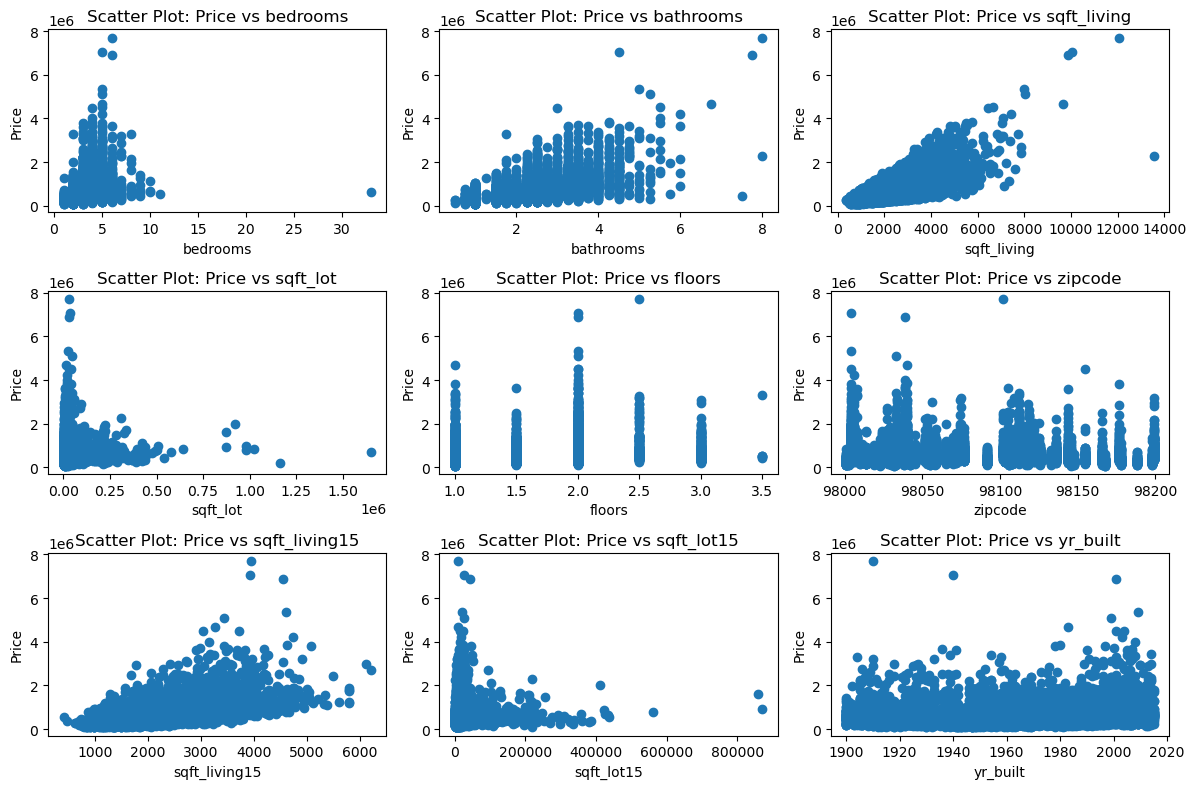

In [19]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'zipcode', 'sqft_living15','sqft_lot15','yr_built']

# Set the figure size and grid layout
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))

# Perform bivariate analysis for each feature
for i, feature in enumerate(features):
    # Calculate the row and column index
    row = i // 3
    col = i % 3
    
    # Scatter Plot
    axs[row, col].scatter(df[feature], df['price'])
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Price')
    axs[row, col].set_title('Scatter Plot: Price vs ' + feature)

# Adjust the spacing between subplots
plt.tight_layout()
plt.savefig('Visualization4')

- Square foot of living has a STRONG correlation with price; we can assume that as the square foot of living increases, so does price.

- Square foot of lot has a high number of 0's. What does this mean? Does this indicate apartment building homes, which is more expansive vertically rather than horizontally (compared to regular flat homes), thus requiring not that much square foot of lot.

In [20]:
# Selecting the numeric columns

numeric_columns = df.select_dtypes(include='number').columns
numeric_df = df[numeric_columns]

In [21]:
# Computing the correlation matrix to check for Linearity

numeric_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016236,0.007883,0.005406,-0.008858,-0.136009,0.020083,-0.009551,0.024011,-0.010419,-0.007812,-0.006173,0.018679,0.000362,-0.141551
price,-0.016236,1.000000,0.305947,0.526228,0.705975,0.083572,0.259193,0.611886,0.048672,0.123077,-0.048661,0.306058,0.020241,0.580963,0.078972
bedrooms,0.007883,0.305947,1.000000,0.512488,0.574179,0.025684,0.180158,0.474835,0.153048,0.016632,-0.148417,-0.007583,0.129424,0.392272,0.025342
bathrooms,0.005406,0.526228,0.512488,1.000000,0.753613,0.080027,0.504916,0.685456,0.504193,0.047255,-0.198798,0.029184,0.221825,0.569053,0.081837
sqft_living,-0.008858,0.705975,0.574179,0.753613,1.000000,0.164512,0.358657,0.876260,0.313206,0.049992,-0.195836,0.057228,0.238786,0.756576,0.176506
sqft_lot,-0.136009,0.083572,0.025684,0.080027,0.164512,1.000000,-0.010454,0.173422,0.051256,0.002169,-0.129495,-0.084771,0.231748,0.144640,0.718327
floors,0.020083,0.259193,0.180158,0.504916,0.358657,-0.010454,1.000000,0.528179,0.486854,-0.001287,-0.057011,0.058032,0.128729,0.281330,-0.013882
sqft_above,-0.009551,0.611886,0.474835,0.685456,0.876260,0.173422,0.528179,1.000000,0.418133,0.018228,-0.256819,0.008248,0.341620,0.732984,0.185205
yr_built,0.024011,0.048672,0.153048,0.504193,0.313206,0.051256,0.486854,0.418133,1.000000,-0.224038,-0.343147,-0.144261,0.407699,0.321026,0.070134
yr_renovated,-0.010419,0.123077,0.016632,0.047255,0.049992,0.002169,-0.001287,0.018228,-0.224038,1.000000,0.068343,0.031955,-0.070667,-0.005096,0.002575


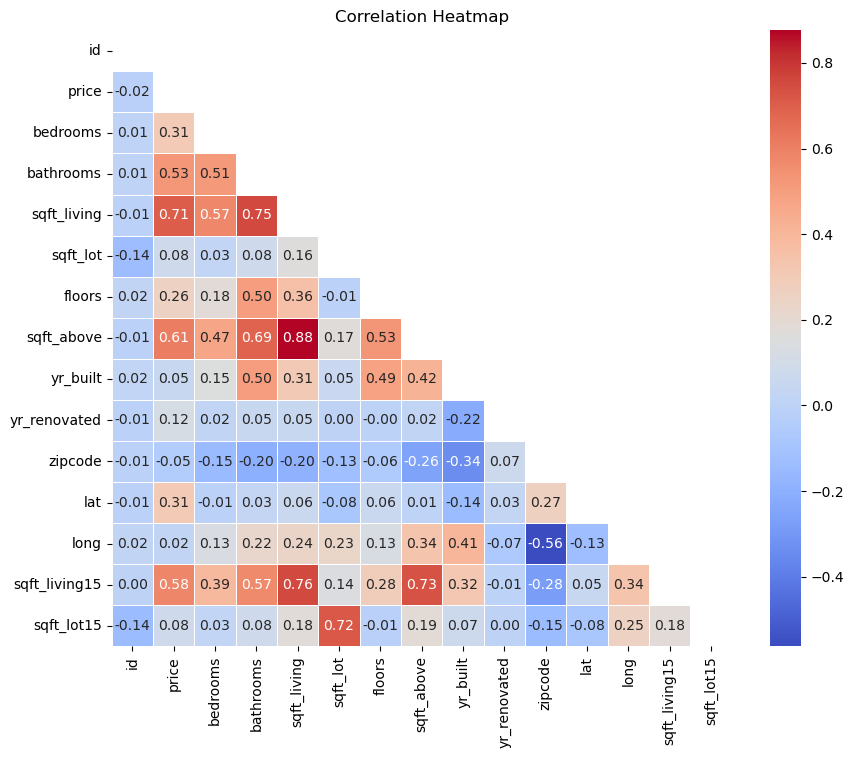

In [22]:
# Creating a heatmap using seaborn

columns=['price', 'bedrooms', 'grade_no', 'yr_built', 'sqft_living', 'floors', 
         'bathrooms', 'cond_avg', 'cond_fair', 'cond_good', 'cond_poor', 'cond_verygood'],
index=['price', 'bedrooms', 'grade_no', 'yr_built', 'sqft_living', 'floors', 
       'bathrooms', 'cond_avg', 'cond_fair', 'cond_good', 'cond_poor', 'cond_verygood']
 
corr_matrix = numeric_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)
ax.set_title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.savefig('Visualization5')

## Data Pre-processing before fitting our Regression Model

This invloves techniques such as:
1. Deal with null values
2. Encoding categorical variables
3. Feature engineering
4. Transformations
5. Feature scaling

In [23]:
# converting sqft_basement and waterfront which involves using OneHotEncorder.
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

Categorical columns include `condition` and `waterfront`.

### One Hot Encoding the Categorical Variables

In [24]:
# One_Hot_Encoding the categorical variables

df["grade_no"]= pd.to_numeric(df['grade'].str.split().str[0])

condition = df[['condition']]
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe.fit(condition)
condition_enc = ohe.transform(condition)
condition_enc = pd.DataFrame(condition_enc,
                             columns=['cond_avg','cond_fair','cond_good','cond_poor','cond_verygood'],
                             index=df.index)
df.drop('condition', axis=1, inplace=True)
df = pd.concat([df, condition_enc], axis=1)

In [25]:
# Selecting our features of relevance

df_values= df[['price','bedrooms','bathrooms','sqft_living','sqft_basement',
               'sqft_lot15', 'grade_no', 'cond_avg', 'cond_fair','cond_good',
               'cond_poor', 'cond_verygood']]

In [26]:
# Confirming if there are any null values

df.isna().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
grade              0
sqft_above         0
sqft_basement    332
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
grade_no           0
cond_avg           0
cond_fair          0
cond_good          0
cond_poor          0
cond_verygood      0
dtype: int64

In [27]:
# Replacing the the null values with 0

df['sqft_basement'] = df['sqft_basement'].fillna(0)

In [28]:
# Checking if the null values have been replaced with 0

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
grade_no         0
cond_avg         0
cond_fair        0
cond_good        0
cond_poor        0
cond_verygood    0
dtype: int64

In [29]:
# Displaying our final df before modeling

df_values

,price,bedrooms,bathrooms,sqft_living,sqft_basement,sqft_lot15,grade_no,cond_avg,cond_fair,cond_good,cond_poor,cond_verygood
1,538000.0,3,2.25,2570,400.0,7639,7,1.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,1960,910.0,5000,7,0.0,0.0,0.0,0.0,1.0
4,510000.0,3,2.00,1680,0.0,7503,8,1.0,0.0,0.0,0.0,0.0
5,1230000.0,4,4.50,5420,1530.0,101930,11,1.0,0.0,0.0,0.0,0.0
6,257500.0,3,2.25,1715,NaN,6819,7,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,130.0,1265,8,1.0,0.0,0.0,0.0,0.0
21592,360000.0,3,2.50,1530,0.0,1509,8,1.0,0.0,0.0,0.0,0.0
21593,400000.0,4,2.50,2310,0.0,7200,8,1.0,0.0,0.0,0.0,0.0
21594,402101.0,2,0.75,1020,0.0,2007,7,1.0,0.0,0.0,0.0,0.0


# LINEAR MODELING

### Checking for the Linearity Assumption.

Here, we assert two things before building our model;

1. We want to include the features which have the highest correlation with our target variable(price).


2. While following the condition above, we want our features not to be multicorrelated with each other.

In [30]:
# checking for correlations between our features and the target variable
# from the highest to the lowest

df.corr()['price'].sort_values(ascending=False).head(15)

price            1.000000
sqft_living      0.705975
grade_no         0.664092
sqft_above       0.611886
sqft_living15    0.580963
bathrooms        0.526228
sqft_basement    0.315663
lat              0.306058
bedrooms         0.305947
floors           0.259193
yr_renovated     0.123077
sqft_lot         0.083572
sqft_lot15       0.078972
cond_verygood    0.055422
yr_built         0.048672
Name: price, dtype: float64

In [31]:
# Checking for Multicollinearity in our predictors
corr_df = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

# Dropping 'level_0' and 'level_1' 
corr_df.set_index(['pairs'], inplace=True)
corr_df.drop(columns=['level_0', 'level_1'], inplace=True)

# Renaming our column
corr_df.columns = ["corr_coef"]

# Veiwing the highly correlated predictor pairs 
# (our threshold is features with a value above 80%)

corr_df[(corr_df.corr_coef > 0.80) & (corr_df.corr_coef < 1)]

,corr_coef
pairs,
"(sqft_living, sqft_above)",0.876260
"(sqft_above, sqft_living)",0.876260
"(cond_avg, cond_good)",0.811063
"(cond_good, cond_avg)",0.811063


In [32]:
# Dropping unnecessary columns
df.drop(columns=['id','date','grade','yr_built','yr_renovated', 'lat', 'long','cond_avg',
                 'cond_fair','cond_good','cond_poor','cond_verygood'], inplace=True)

In [33]:
# Checking the metadata of the remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15676 entries, 1 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15676 non-null  float64
 1   bedrooms       15676 non-null  int64  
 2   bathrooms      15676 non-null  float64
 3   sqft_living    15676 non-null  int64  
 4   sqft_lot       15676 non-null  int64  
 5   floors         15676 non-null  float64
 6   waterfront     15676 non-null  object 
 7   view           15676 non-null  object 
 8   sqft_above     15676 non-null  int64  
 9   sqft_basement  15676 non-null  float64
 10  zipcode        15676 non-null  int64  
 11  sqft_living15  15676 non-null  int64  
 12  sqft_lot15     15676 non-null  int64  
 13  grade_no       15676 non-null  int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 1.8+ MB


## Defining our Functions for use

In [34]:
# Defining a function for fitting our model
def run_model(data):
    x = data.drop('price', axis=1)
    y = data['price']
    linreg = LinearRegression()
    crossvalidation = KFold(n_splits = 10, shuffle = True, random_state = 1)
    mean_r2 = np.mean(cross_val_score(linreg, x, y, scoring='r2', cv=crossvalidation))
    mse = np.mean(cross_val_score(linreg, x, y, scoring='neg_mean_squared_error', cv=crossvalidation))*-1
    rmse = np.sqrt(mse)
    
    x_cols = data.drop('price', axis=1).columns
    y_col = 'price'
    plus = '+'.join(x_cols)
    formula = y_col + '~' + plus
    model = ols(formula=formula, data=data).fit()
    print('The mean r^2 for a KFold test with 10 splits is {} \n'.format(mean_r2))
    print('The mean RMSE for a KFold test with 10 splits is {} \n'.format(rmse))
    print(model.summary())
   
    # Testing for homoscedasticity
    residuals = model.resid
    fig, ax = plt.subplots(figsize=(15,8))
    plt.scatter(model.predict(x), residuals)
    plt.plot(model.predict(x), [np.mean(residuals) for i in range(len(data))])
    ax.set_title('Homoscedasticity')
    plt.show()
    print('\n')
    
    # Testing for normality using a QQ-plot 
    fig, ax = plt.subplots(figsize=(15,8))
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=ax)
    ax.set_title('QQ Plot')
    plt.show()

In [35]:
# Defining a function to perform log transformations
def log_transform(features, df):
    for feat in features:
        df[feat] = df[feat].map(lambda x: np.log(x))
    return df

In [36]:
# Defining a function to generate a heatmap
def heatmap(data):
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, cmap='Reds', annot=True, ax=ax);

In [37]:
# Defining a function to remove outliers from our features
def outliers(features, data):
    for feat in features:
        mu = np.mean(data[feat])
        std = np.std(data[feat])
        outlier = 3*std
        data = data[(data[feat] <= mu+outlier) & (data[feat] >= mu-outlier)]
    return data

In [38]:
# Defining a function to perform OneHotEncoding
def scale_ohe(ohe_feature, data):
    ohe = pd.get_dummies(data[ohe_feature], prefix=ohe_feature, drop_first=True)
    no_ohe = data.drop(ohe_feature, axis=1)
    no_ohe_scale = no_ohe.apply(scale)
    return pd.concat([no_ohe_scale, ohe], axis=1)

In [39]:
# Defining a function for getting the coefficients of features
def get_coefficients_continuous(scaled_coefs, features):
    for i, feat in enumerate(features):
        maximum = df_log['price'].max()
        minimum = df_log['price'].min()
        range_feat = df_no_outlier[feat].max() - df_no_outlier[feat].min()
        unscale = abs(scaled_coefs[i])*(maximum-minimum)+minimum
        unlog = math.exp(unscale)
        
        slope_actual = unlog/range_feat
        
        if scaled_coefs[i] >= 0:
            print('Coefficient for {} is ${}'.format(feat, slope_actual))
        else:
            print('Coefficient for {} is ${}'.format(feat, slope_actual*-1))

In [40]:
df = df[df['sqft_basement'] != '?']
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [41]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [42]:
df['basement'] = np.where(df['sqft_basement'] > 0, 1, 0)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,grade_no,basement
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,2170,400.0,98125,1690,7639,7,1
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,1050,910.0,98136,1360,5000,7,1
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,1680,0.0,98074,1800,7503,8,0
5,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,3890,1530.0,98053,4760,101930,11,1
6,257500.0,3,2.25,1715,6819,2.0,NO,NONE,1715,0.0,98003,2238,6819,7,0


In [43]:
df.drop(columns=["sqft_basement","waterfront","view"], inplace=True)

## Building the Baseline model

For the baseline model, we will do a simple linear regression, using the most highly correlated feature and then we improve our model from there through an iterative process whereby we perform techniques such as:

1. Dealing with outliers, i.e. either removing outliers or apply transformations to make the data more robust to outliers.  
2. Transormations e.g. log transformations of our features.
3. Feature Scaling, i.e. to ensure that all features are on a similar scale. Common scaling techniques include standardization (mean normalization) or normalization (min-max scaling). This will aid in direct comparison of our features and determine which has the highest impact on our target variable.

In [44]:
# Assigning our features and target variables
X = df["sqft_living"]  
y = df['price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Model with statsmodels
X_train_with_intercept = sm.add_constant(X_train)
baseline_model = sm.OLS(y_train, X_train_with_intercept)
baseline_results = baseline_model.fit()
baseline_predictions = baseline_results.predict(sm.add_constant(X_test))
baseline_rmse = mean_squared_error(y_test, baseline_predictions, squared=False)

print("Baseline Model RMSE:", baseline_rmse)
print(baseline_results.summary())

Baseline Model RMSE: 271201.25051764137
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.229e+04
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:20:11   Log-Likelihood:            -1.7425e+05
No. Observations:               12540   AIC:                         3.485e+05
Df Residuals:                   12538   BIC:                         3.485e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

## Interpretation of results

1. The model is generally statistically significant with an F-statistic p_value of 0.0 at a significance level of 0.05 
 

2.  The R-squared value is 0.495, indicating that approximately 49.5% of the variation in the price can be explained by the sqft_living variable. This value is very low and the model needs improving.


3. The coefficient of the constant term (const) is -5.235e+04, and the coefficient of the sqft_living variable is 285.1177. These coefficients represent the expected change in the price for a one-unit change in the corresponding predictor variable, assuming other variables are held constant,e.g. For a one-unit increase in square-foot living area, we see an associated increase in around 285 dollars in selling price of the houses.

# Iteration 1

Here we perform the first iteration whereby we have included more features into the model.
We also perform a KFold test with 10 splits and get the mean r-squared as well as the mean RMSE of our model.

The mean r^2 for a KFold test with 10 splits is 0.5586085482186991 

The mean RMSE for a KFold test with 10 splits is 247521.86276668648 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     1819.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:20:13   Log-Likelihood:            -2.1689e+05
No. Observations:               15676   AIC:                         4.338e+05
Df Residuals:                   15664   BIC:                         4.339e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025  

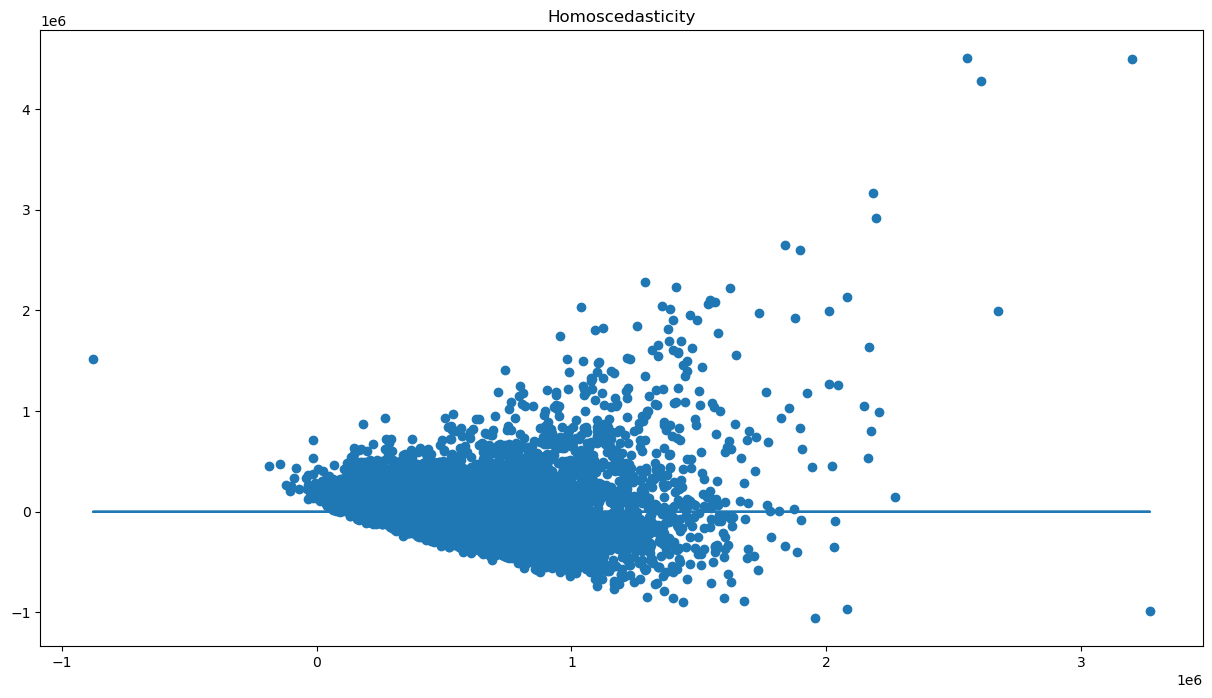

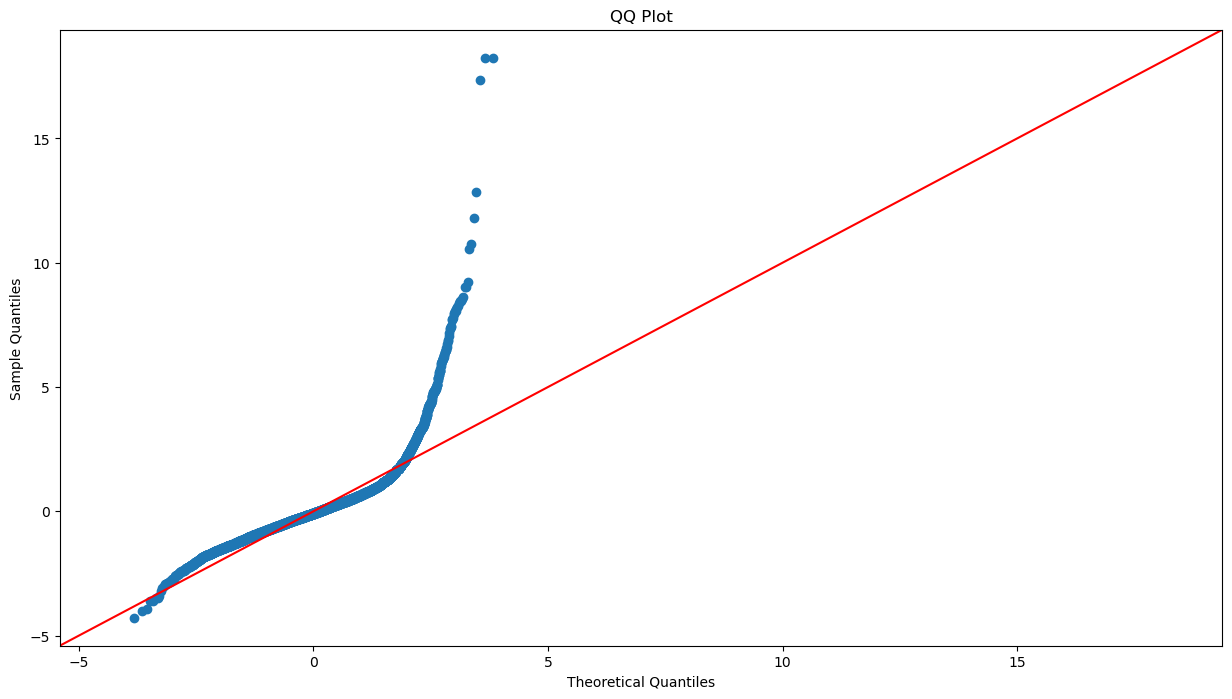

In [45]:
# Fit our model using the defined function

run_model(df)

## Interpretation of results

1. The model is generally statistically significant with an F-statistic p_value of 0.0 at a significance level of 0.05 
 

2.  The R-squared value is 0.561, indicating that approximately 56.1% of the variation in the price can be explained by the model. This value indicates an improvement of the baseline model.


3. The plot to test for homoscedasticity reveals that the residuals are somewhat heteroscedastic because they are diverging/variating. This is an indication of skewness/heavy-tailed dataset/presence of outliers.


4. The QQ-plot is used to test for normality of residuals. In this case, the residuals appear not to be normal because they are diverging off the line.

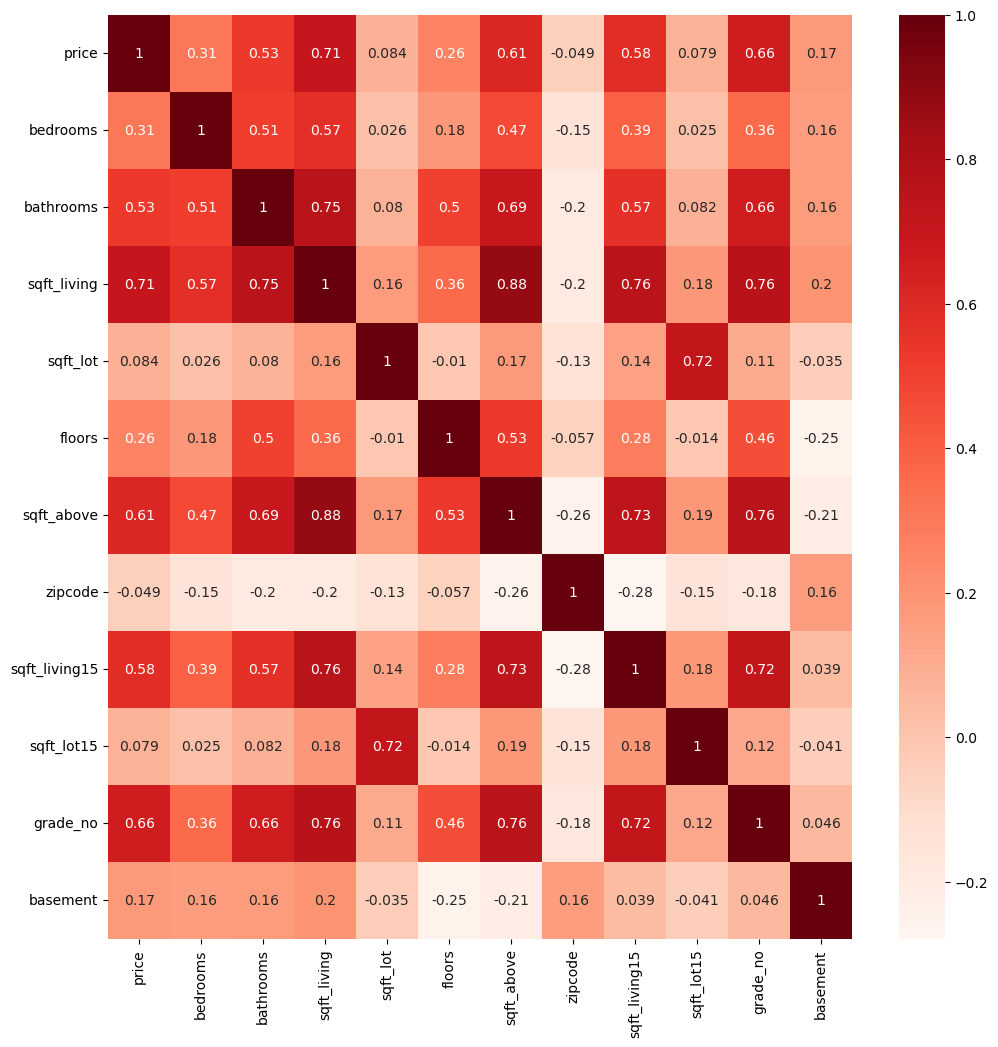

In [46]:
# Generating the heatmap
heatmap(df)

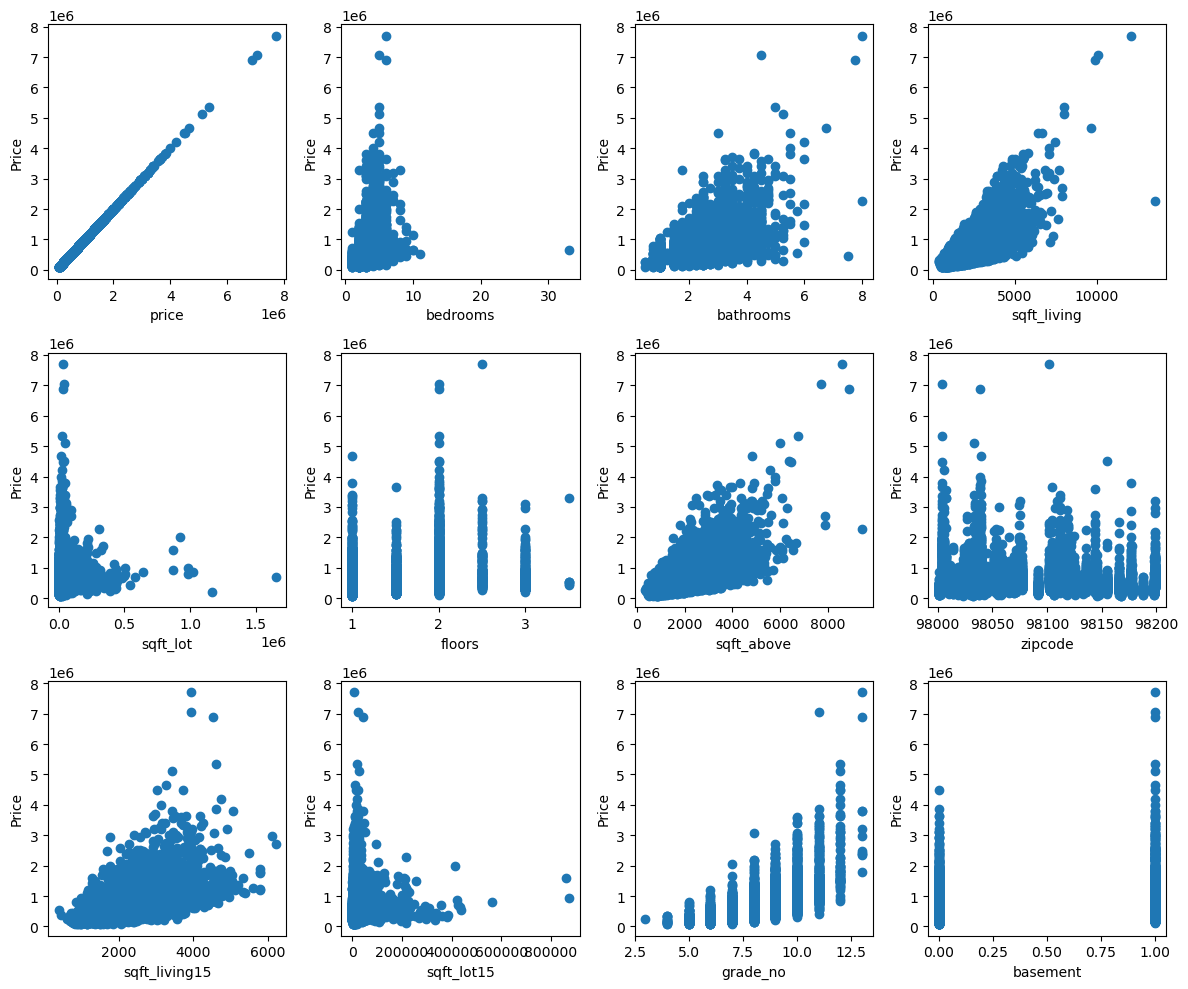

In [47]:
# Plot scatter plots against "price"
X = df
y = df["price"]

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))
flatten_axes = axes.flatten()

for i, column in enumerate(X.columns):
    flatten_axes[i].scatter(X[column], y)
    flatten_axes[i].set_xlabel(column)
    flatten_axes[i].set_ylabel("Price")

plt.tight_layout()
plt.show()

In [48]:
continuous = ['price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'bedrooms', 'bathrooms', 'floors']
df_no_outlier = outliers(continuous, df)
df_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14582 entries, 1 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          14582 non-null  float64
 1   bedrooms       14582 non-null  int64  
 2   bathrooms      14582 non-null  float64
 3   sqft_living    14582 non-null  int64  
 4   sqft_lot       14582 non-null  int64  
 5   floors         14582 non-null  float64
 6   sqft_above     14582 non-null  int64  
 7   zipcode        14582 non-null  int64  
 8   sqft_living15  14582 non-null  int64  
 9   sqft_lot15     14582 non-null  int64  
 10  grade_no       14582 non-null  int64  
 11  basement       14582 non-null  int32  
dtypes: float64(3), int32(1), int64(8)
memory usage: 1.4 MB


# Iteration 2

In this iteration, we tried to remove outliers from our data to see the impact on our model's performance.

The mean r^2 for a KFold test with 10 splits is 0.5023419026527066 

The mean RMSE for a KFold test with 10 splits is 173691.96725603298 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     1348.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:20:24   Log-Likelihood:            -1.9661e+05
No. Observations:               14582   AIC:                         3.932e+05
Df Residuals:                   14570   BIC:                         3.933e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025  

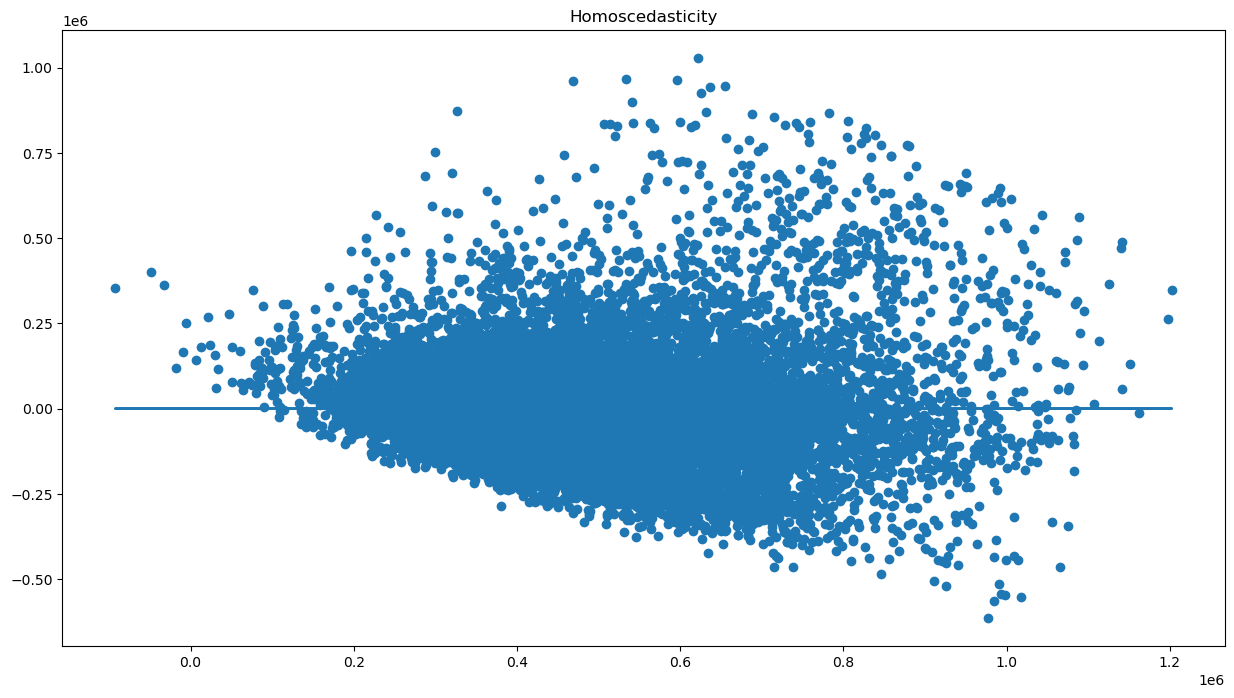

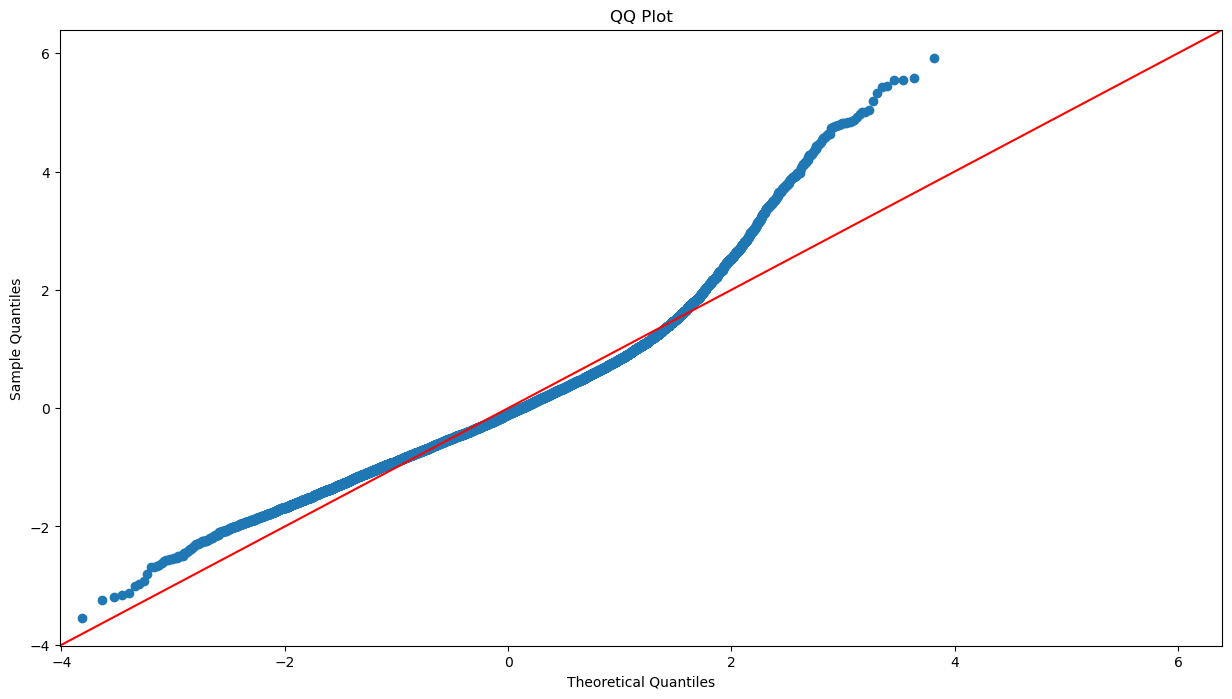

In [49]:
# Fitting our model without outliers

run_model(df_no_outlier)

## Interpretation of results

1. The model is generally statistically significant with an F-statistic p_value of 0.0 at a significance level of 0.05 
 

2.  The R-squared value is 0.504, indicating that approximately 50.4% of the variation in the price can be explained by the model. This value indicates a drop from the previous model.


3. The plot to test for homoscedasticity reveals that the residuals are becoming homoscedastic because they are converging and appear to be having an equal variance. So this assumption is satisfied.


4. The QQ-plot is used to test for normality of residuals. In this case, the residuals appear to be somewhat normal but there is still presence of skewness/heavy-tails/outliers.

In [50]:
# Displaying the DataFrame
df_no_outlier

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,zipcode,sqft_living15,sqft_lot15,grade_no,basement
1,538000.0,3,2.25,2570,7242,2.0,2170,98125,1690,7639,7,1
3,604000.0,4,3.00,1960,5000,1.0,1050,98136,1360,5000,7,1
4,510000.0,3,2.00,1680,8080,1.0,1680,98074,1800,7503,8,0
6,257500.0,3,2.25,1715,6819,2.0,1715,98003,2238,6819,7,0
8,229500.0,3,1.00,1780,7470,1.0,1050,98146,1780,8113,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1294,2.0,1180,98116,1330,1265,8,1
21592,360000.0,3,2.50,1530,1131,3.0,1530,98103,1530,1509,8,0
21593,400000.0,4,2.50,2310,5813,2.0,2310,98146,1830,7200,8,0
21594,402101.0,2,0.75,1020,1350,2.0,1020,98144,1020,2007,7,0


In [51]:
df_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14582 entries, 1 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          14582 non-null  float64
 1   bedrooms       14582 non-null  int64  
 2   bathrooms      14582 non-null  float64
 3   sqft_living    14582 non-null  int64  
 4   sqft_lot       14582 non-null  int64  
 5   floors         14582 non-null  float64
 6   sqft_above     14582 non-null  int64  
 7   zipcode        14582 non-null  int64  
 8   sqft_living15  14582 non-null  int64  
 9   sqft_lot15     14582 non-null  int64  
 10  grade_no       14582 non-null  int64  
 11  basement       14582 non-null  int32  
dtypes: float64(3), int32(1), int64(8)
memory usage: 1.4 MB


In [52]:
# Dropping unnecessary columns
df_no_outlier.drop(columns=["sqft_above","grade_no"],inplace=True)

In [53]:
df_no_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14582 entries, 1 to 21596
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          14582 non-null  float64
 1   bedrooms       14582 non-null  int64  
 2   bathrooms      14582 non-null  float64
 3   sqft_living    14582 non-null  int64  
 4   sqft_lot       14582 non-null  int64  
 5   floors         14582 non-null  float64
 6   zipcode        14582 non-null  int64  
 7   sqft_living15  14582 non-null  int64  
 8   sqft_lot15     14582 non-null  int64  
 9   basement       14582 non-null  int32  
dtypes: float64(3), int32(1), int64(6)
memory usage: 1.2 MB


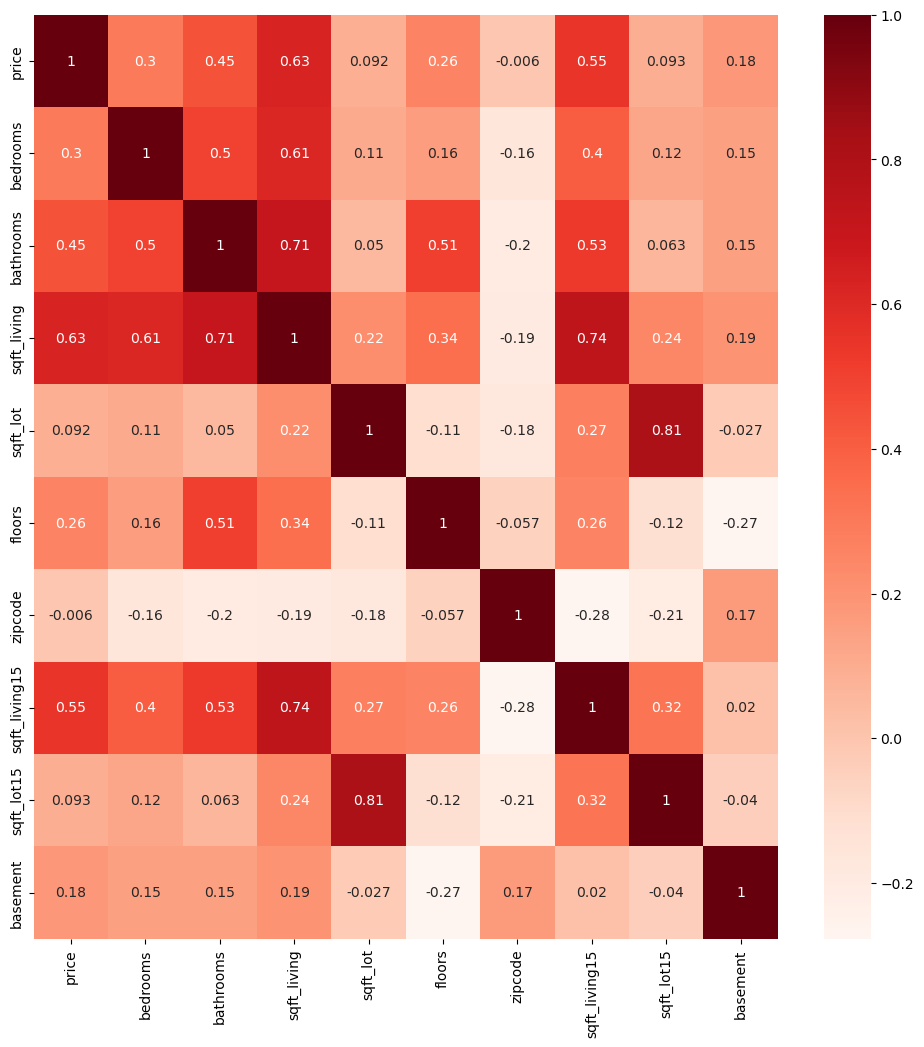

In [54]:
# Displaying the heatmap
heatmap(df_no_outlier)

# Iteration 3

In this iteration, we perform some normalization and log-transformations. This will help to mitigate the presence of outliers in our dataset and hence make the dataset more robust, and also improving the linearity between the target variable(price) and the features.

### Normalization and Log_transformation

In [55]:
# Displaying the DataFrame
df_no_outlier

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode,sqft_living15,sqft_lot15,basement
1,538000.0,3,2.25,2570,7242,2.0,98125,1690,7639,1
3,604000.0,4,3.00,1960,5000,1.0,98136,1360,5000,1
4,510000.0,3,2.00,1680,8080,1.0,98074,1800,7503,0
6,257500.0,3,2.25,1715,6819,2.0,98003,2238,6819,0
8,229500.0,3,1.00,1780,7470,1.0,98146,1780,8113,1
...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1294,2.0,98116,1330,1265,1
21592,360000.0,3,2.50,1530,1131,3.0,98103,1530,1509,0
21593,400000.0,4,2.50,2310,5813,2.0,98146,1830,7200,0
21594,402101.0,2,0.75,1020,1350,2.0,98144,1020,2007,0


In [56]:
# Checking the correlations in descending order
df_no_outlier.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.627050
sqft_living15    0.550582
bathrooms        0.446199
bedrooms         0.297462
floors           0.256793
basement         0.178915
sqft_lot15       0.093464
sqft_lot         0.091582
zipcode         -0.005953
Name: price, dtype: float64

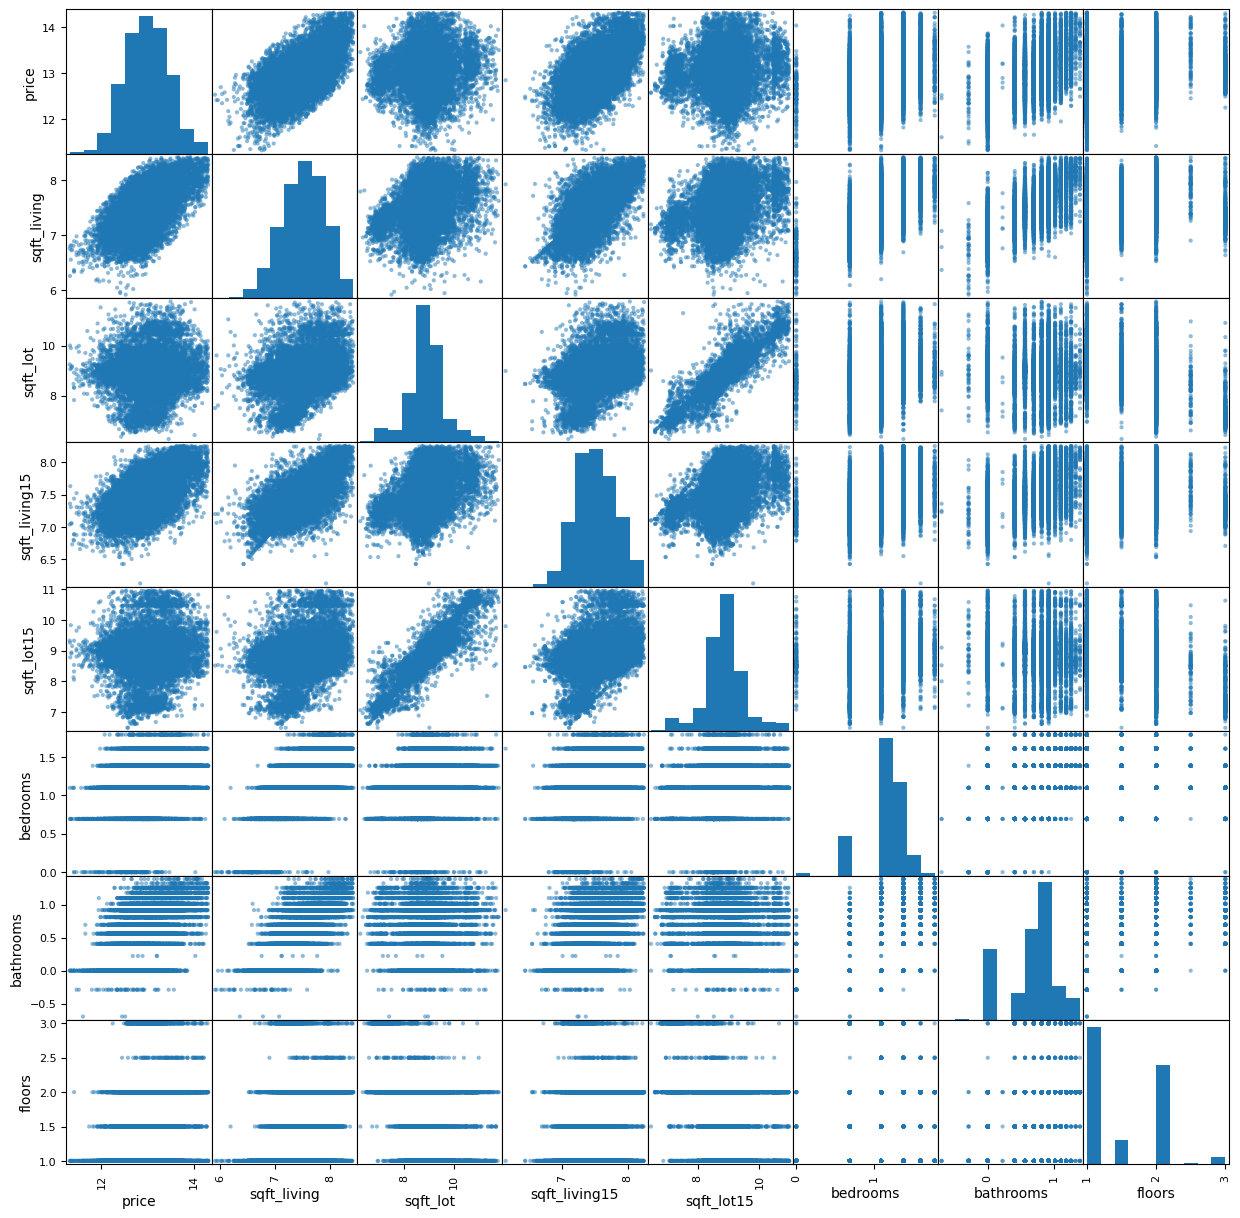

In [57]:
# Performing log transformations using our defined function
normalize = ['price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'bedrooms','bathrooms']
df_log = log_transform(normalize, df_no_outlier)
pd.plotting.scatter_matrix(df_log[continuous], figsize=(15, 15));

The mean r^2 for a KFold test with 10 splits is 0.4554089040151279 

The mean RMSE for a KFold test with 10 splits is 0.3484858194557071 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     1362.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:20:46   Log-Likelihood:                -5309.7
No. Observations:               14582   AIC:                         1.064e+04
Df Residuals:                   14572   BIC:                         1.072e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025  

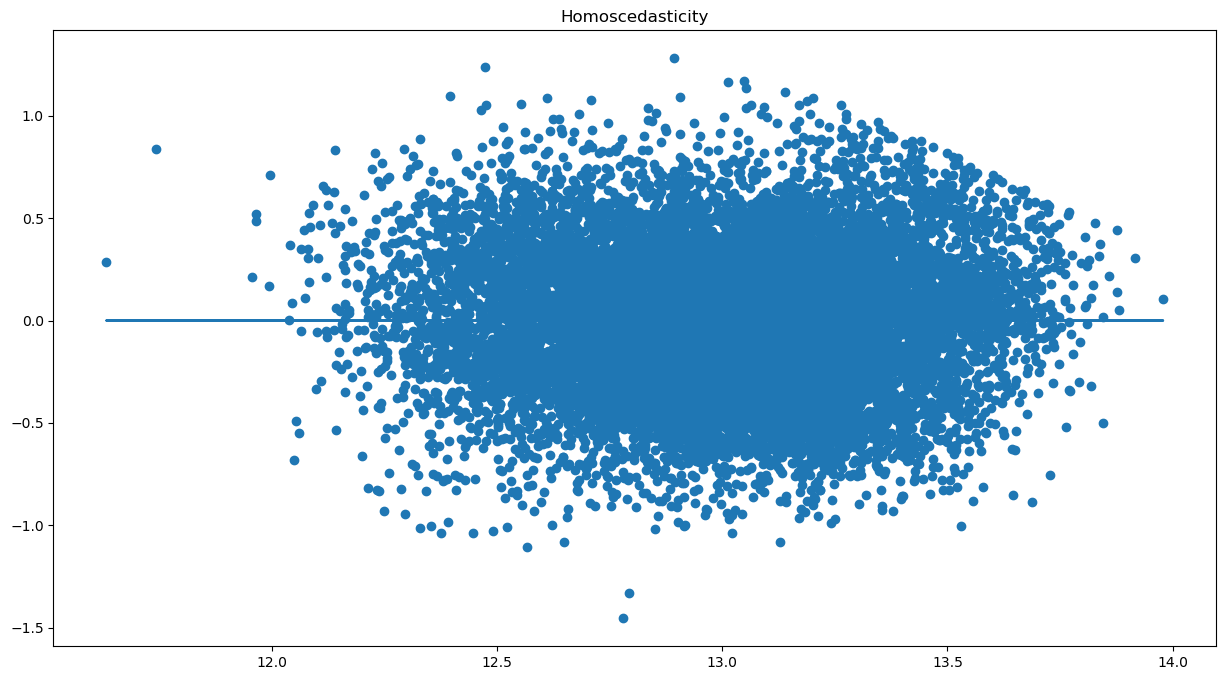

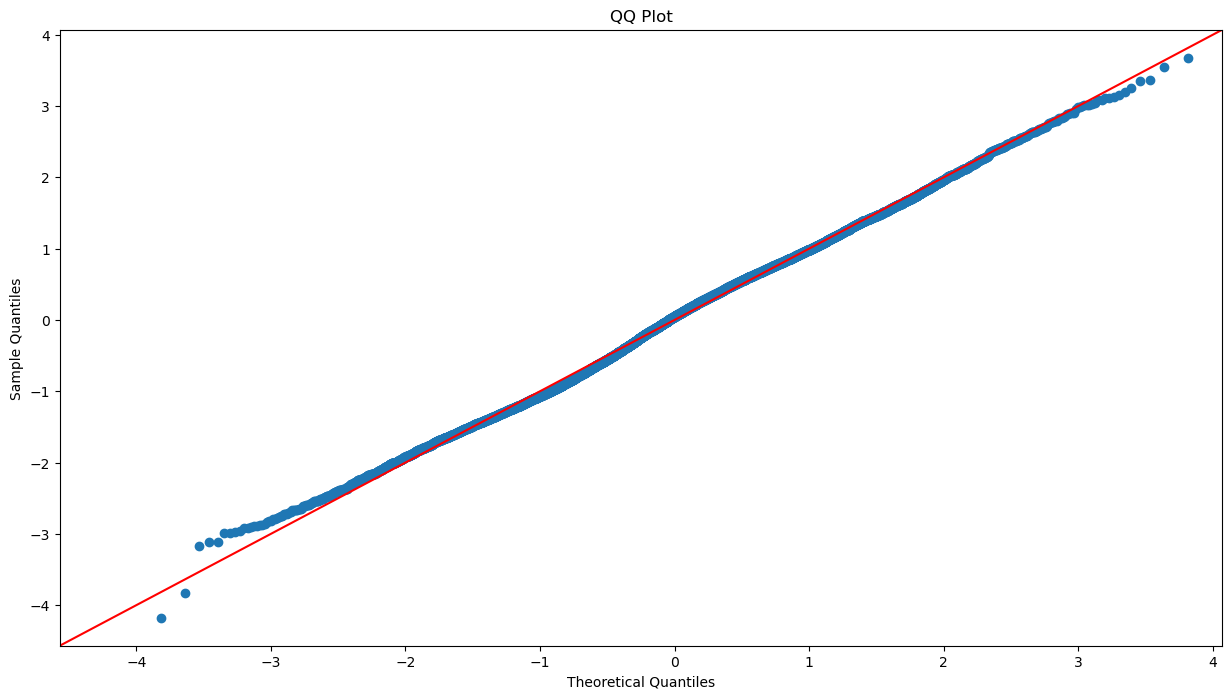

In [58]:
# Using our `df_log` we fit our model using our defined function
run_model(df_log)

## Interpretation of results

1. The model is generally statistically significant with an F-statistic p_value of 0.0 at a significance level of 0.05 
 

2.  The R-squared value is 0.457, indicating that approximately 45.7% of the variation in the price can be explained by the model. This value indicates a drop from the previous model.


3. The plot to test for homoscedasticity reveals that the residuals are now homoscedastic because they are converging and appear to be having an equal variance. So this assumption remains satisfied.


4. The QQ-plot is used to test for normality of residuals. In this case, the residuals appear to be almost perfectly normal as they are following along the line almost neatly.

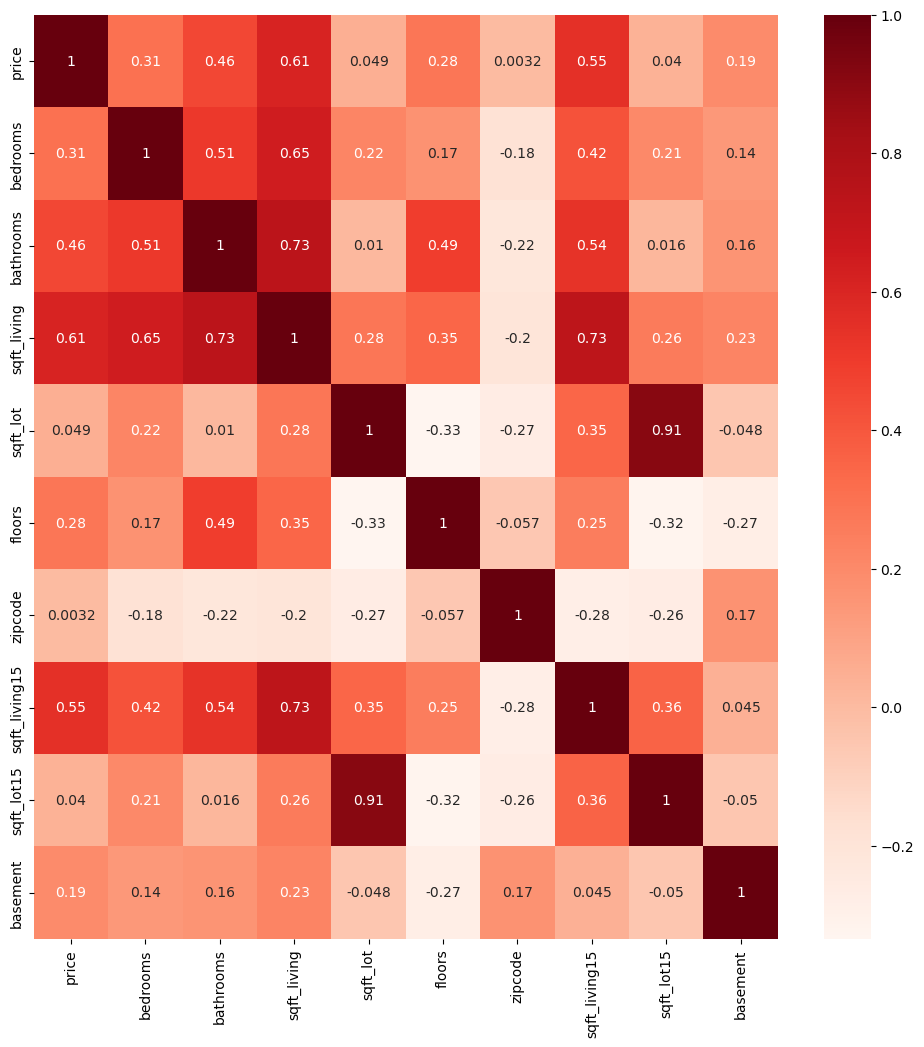

In [59]:
# Displaying the heatmap
heatmap(df_log)

# Iteration 4 (Final Model)

### One hot encode Zipcode

In [60]:
# Define a function to perform feature scaling
def scale(feature):
    return (feature-feature.min())/(feature.max()-feature.min())

# OneHotEncoding zipcode
df_scale = scale_ohe('zipcode', df_log)

In [61]:
df_scale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14582 entries, 1 to 21596
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          14582 non-null  float64
 1   bedrooms       14582 non-null  float64
 2   bathrooms      14582 non-null  float64
 3   sqft_living    14582 non-null  float64
 4   sqft_lot       14582 non-null  float64
 5   floors         14582 non-null  float64
 6   sqft_living15  14582 non-null  float64
 7   sqft_lot15     14582 non-null  float64
 8   basement       14582 non-null  float64
 9   zipcode_98002  14582 non-null  uint8  
 10  zipcode_98003  14582 non-null  uint8  
 11  zipcode_98004  14582 non-null  uint8  
 12  zipcode_98005  14582 non-null  uint8  
 13  zipcode_98006  14582 non-null  uint8  
 14  zipcode_98007  14582 non-null  uint8  
 15  zipcode_98008  14582 non-null  uint8  
 16  zipcode_98010  14582 non-null  uint8  
 17  zipcode_98011  14582 non-null  uint8  
 18  zipcod

The mean r^2 for a KFold test with 10 splits is 0.8313639887029263 

The mean RMSE for a KFold test with 10 splits is 0.06464512379839614 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     942.1
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:20:53   Log-Likelihood:                 19334.
No. Observations:               14582   AIC:                        -3.851e+04
Df Residuals:                   14504   BIC:                        -3.792e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025 

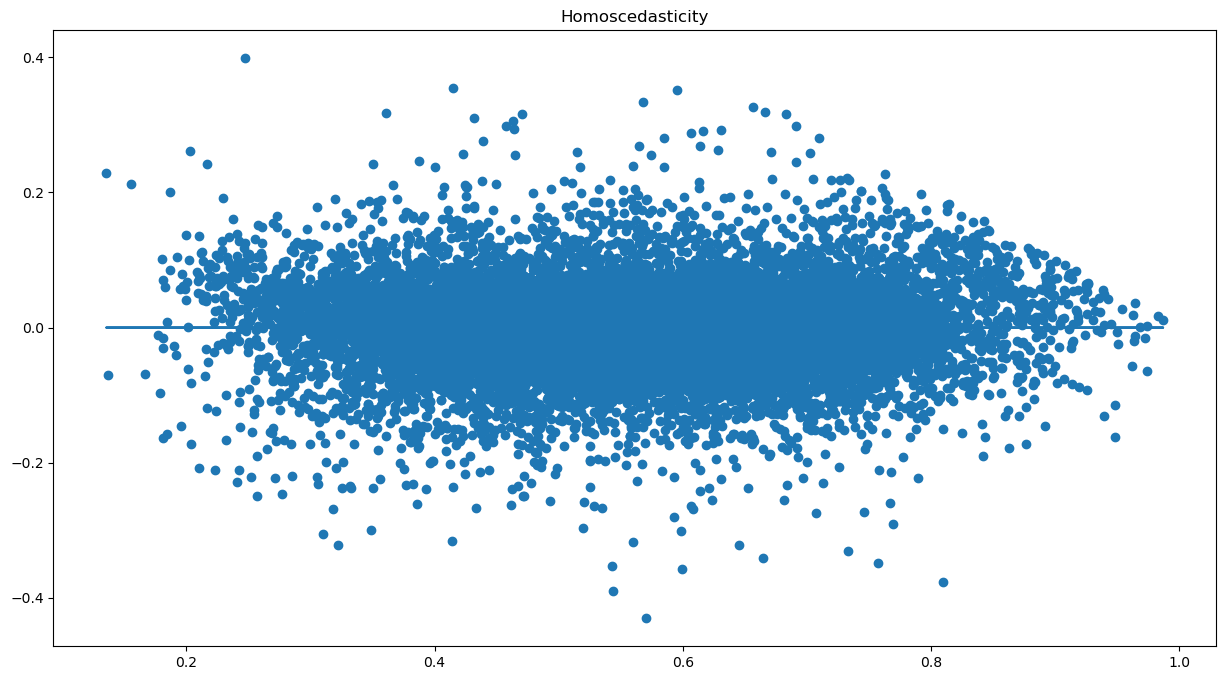

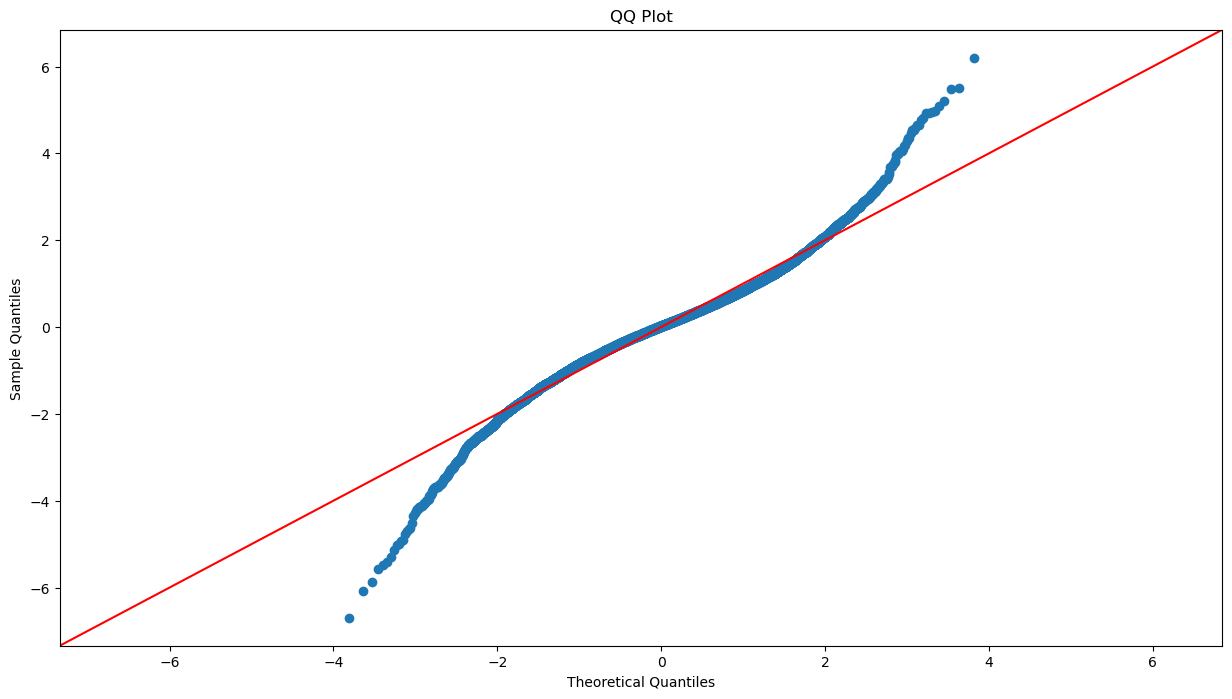

In [62]:
# Using our `df_scale` we fit our model using our defined function
run_model(df_scale)

In [63]:
# Defining a function for getting the coefficients
def get_coefficients_categorical(scaled_coefs, features):
    for i, feat in enumerate(features):
        maximum = df_log['price'].max()
        minimum = df_log['price'].min()
        unscale = abs(scaled_coefs[i])*(maximum-minimum)+minimum
        unlog = math.exp(unscale)
        if scaled_coefs[i] >= 0:
            print('Coefficient for {} is ${}'.format(feat, unlog))
        else:
            print('Coefficient for {} is ${}'.format(feat, unlog*-1))

In [64]:
# Defining a function for getting the coefficients
def get_coefficients_continuous(scaled_coefs, features):
    for i, feat in enumerate(features):
        maximum = df_log['price'].max()
        minimum = df_log['price'].min()
        range_feat = df_no_outlier[feat].max() - df_no_outlier[feat].min()
        unscale = abs(scaled_coefs[i])*(maximum-minimum)+minimum
        unlog = math.exp(unscale)
        
        slope_actual = unlog/range_feat
        
        if scaled_coefs[i] >= 0:
            print('Coefficient for {} is ${}'.format(feat, slope_actual))
        else:
            print('Coefficient for {} is ${}'.format(feat, slope_actual*-1))

In [65]:
# Using our defined function to get the coefficients
categorical_coef = [0.2428, 0.2082, 0.3097, 0.2600, 0.2331]
categorical_features = ['zipcode_98008', 'zipcode_98074', 'zipcode_98117', 'zipcode_98144', 'zipcode_98177']

continuous_coef = [0.4423, 0.1799, -0.0545, 0.0086, 0.0552, 0.1140]
continuous_features = ['sqft_living', 'sqft_living15', 'bedrooms', 'floors', 'bathrooms', 'sqft_lot']

get_coefficients_categorical(categorical_coef, categorical_features)
get_coefficients_continuous(continuous_coef, continuous_features)

Coefficient for zipcode_98008 is $169959.30663666
Coefficient for zipcode_98074 is $153192.66292287616
Coefficient for zipcode_98117 is $207759.30309087687
Coefficient for zipcode_98144 is $178964.988254935
Coefficient for zipcode_98177 is $165081.8589739885
Coefficient for sqft_living is $123487.74911877913
Coefficient for sqft_living15 is $66394.5581188671
Coefficient for bedrooms is $-53899.42895874723
Coefficient for floors is $42072.219101705305
Coefficient for bathrooms is $46540.35864547536
Coefficient for sqft_lot is $20891.42559555274


## Train Test Split

In [66]:
# Getting a copy of our df
df_tts = df.copy()
x = df_tts.drop('price', axis=1)
y = df_tts['price']

Split original data into training data (80%) and testing data (20%).

In [67]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

Concat x with y to remove outliers

In [68]:
# Concat x with y to remove outliers
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)
len(train)

12540

Remove outliers separately

In [69]:
# Remove outliers separately
train1 = outliers(continuous, train)
test1 = outliers(continuous, test)
len(train1)

11689

Log transform train and test splits

In [70]:
# Log transform train and test splits
train2 = log_transform(normalize, train1)
test2 = log_transform(normalize, test1)

Scale and OHE training and testing data separately

In [71]:
# Scale and OHE training and testing data separately
train_preprocessed = scale_ohe('zipcode', train2)

test_preprocessed = scale_ohe('zipcode', test2)

Drop features determined by our final model

In [72]:
# Drop features determined by our final model
train_preprocessed.drop(['sqft_lot15', 'zipcode_98002', 'zipcode_98023', 'zipcode_98032'], axis=1, inplace=True)
test_preprocessed.drop(['sqft_lot15', 'zipcode_98002', 'zipcode_98023', 'zipcode_98032'], axis=1, inplace=True)

Apply interactions determined by our final model

In [73]:
# Apply interactions determmined by our final model
train_preprocessed['sqft_living*floors'] = train_preprocessed['sqft_living']*train_preprocessed['floors']
test_preprocessed['sqft_living*floors'] = test_preprocessed['sqft_living']*test_preprocessed['floors']

Check to see that the training and testing sets are split correctly

In [74]:
# Check to see that the training and testing sets are split correctly
x_train_preprocessed = train_preprocessed.drop('price', axis=1)
y_train_preprocessed = train_preprocessed['price']

x_test_preprocessed = test_preprocessed.drop('price', axis=1)
y_test_preprocessed = test_preprocessed['price']

print(len(x_train_preprocessed), len(x_test_preprocessed), len(y_train_preprocessed), len(y_test_preprocessed))

11689 2891 11689 2891


Run testing data through training model

In [75]:
# Run testing data through training model
linreg = LinearRegression()
linreg.fit(x_train_preprocessed, y_train_preprocessed)
y_hat_test = linreg.predict(x_test_preprocessed)

test_rmse = mean_squared_error(y_test_preprocessed, y_hat_test, squared=False)
test_rmse

0.06354299190202385

In [76]:
# Calculate evaluation metrics on the original scale
y_pred_original = np.exp(y_hat_test)  # Transform predicted values back to the original scale
y_test_original = np.exp(y_test_preprocessed)  # Transform actual values back to the original scale

rmse_original = mean_squared_error(y_test_original, y_pred_original, squared=False)

print("RMSE in original scale:", rmse_original)

RMSE in original scale: 0.11213695163182008


# CONCLUSIONS

### Interpretation of results from the Final Model

1. The model is generally statistically significant with an F-statistic p_value of 0.0 at a significance level of 0.05 
 

2.  The R-squared value is 0.833, indicating that approximately 83.3% of the variation in the price can be explained by the model. This value indicates a great improvement from the previous model.


3. Also, of great importance to note is that the mean RMSE is approximately 0.06465. Then the RMSE in original scale is 0.1135. This means that our model is off by about 0.1135 when making an average prediction, indicating that it is a good model.


4. These coefficients represent the expected change in the price for a one-unit change in the corresponding predictor variable, assuming other variables are held constant.

* ZIPCODE--is a strong predictor of a homes value, the saying "Location, Location, Location" holds true, as even in a similar area the location plays a huge factor in the value of a home.

Based on the coefficients of different localities, moving from zip code 98002 to 98039 shows that the prices changes by USD 228,087 and USD 298,174 respectively, as compared to our reference categorical variable which is zipcode 98001. This is a clear indication that locality of the house has high influence on the price.

* Coefficient for `sqft_living` is $123487.74911877913

 - For a one-unit increase in square-foot living area, we see an associated increase in around $123487.74 in selling price of the houses.
 

* Coefficient for `sqft_living15` is $66394.5581188671

 -  For a one-unit increase in square-foot living area15, we see an associated increase in around $66394.55 in selling price of the houses.
 

* Coefficient for `floors` is $42072.219101705305

 -  For a one-unit increase in number of floors of the house, we see an associated increase in around $42072.21 in selling price of the houses.
 

* Coefficient for `bathrooms` is $46540.35864547536

 -  For a one-unit increase in the number of bathrooms, we see an associated increase in around $46540.35 in selling price of the houses.
 

* Coefficient for `sqft_lot` is $20891.42559555274

 -  For a one-unit increase in square-foot of the lot area, we see an associated increase in around $20891.42 in selling price of the houses.
 

* Coefficient for `bedrooms` is $-53899.42895874723

 -  For a one-unit increase in the number of bedrooms, we see an associated decrease in around $53899.42 in selling price of the houses. This particular finding caught our attention as this is not the case in the real world, whereby typically as you increase the number of bedrooms in a house, the price of the house tends to increase too.
 

5. The plot to test for homoscedasticity reveals that the residuals are now homoscedastic because they are converging and appear to be having an equal variance. So this assumption remains satisfied.


6. The QQ-plot is used to test for normality of residuals. In this case, the residuals appear to be almost normal as they are following along the line almost neatly, except for the ends where it indicates there could be some skewness in the data.

# RECOMMENDATIONS

1. The real estate agency should explore properties that occupy a large square foot of the lot area since, for a one-unit increase in square-foot of the lot area, we see an associated increase in around $ 20891.42 in selling price of the houses.


2. The real estate agency should explore properties that have more bathrooms since, for a one-unit increase in the number of bathrooms, we see an associated increase in around $ 46540.35 in selling price of the houses.


3. The real estate agency should explore properties that occupy a large square foot of living area since, for a one-unit increase in square-foot living area, we see an associated increase in around $ 123487.74 in selling price of the houses.


4. The real estate agency should explore properties with more floors since, for a one-unit increase in number of floors of the house, we see an associated increase in around $ 42072.21 in selling price of the houses.

# NEXT STEPS

1. More research is required to have a more integrated and informative dataset for finding more factors that influence the price. Also, use of more complex and robust regression models that will help to deal with the outliers.


2. Using datasets from other counties to be able to better advice our customers from comparing the dataset results.


3. It is also important for the agency to continuously evaluate the effectiveness of the strategies they implement and make adjustments as necessary. This could involve tracking metrics like, this model, social media engagement/reviews, and lead generation to assess the impact of their efforts and identify areas for improvement.